        sender   receiver  group
0          115          4      1
1          115          7      1
2          115         59      1
3          115        168      1
4          115        232      1
...        ...        ...    ...
69756      229        113  10231
69757      229        188  10231
69758      229        357  10231
69759      229         62  10231
69760      229         48  10231

[69761 rows x 3 columns]
        sender   receiver  group
0          115          4      1
1          115          7      1
2          115         59      1
3          115        168      1
4          115        232      1
...        ...        ...    ...
56167      120        373   8027
56168      120        415   8027
56169      288        425   8028
56170      288        386   8028
56171      288        175   8028

[56172 rows x 3 columns]
        sender   receiver  group
0            4        237      1
1            4        370      1
2            4        238      1
3            4         5

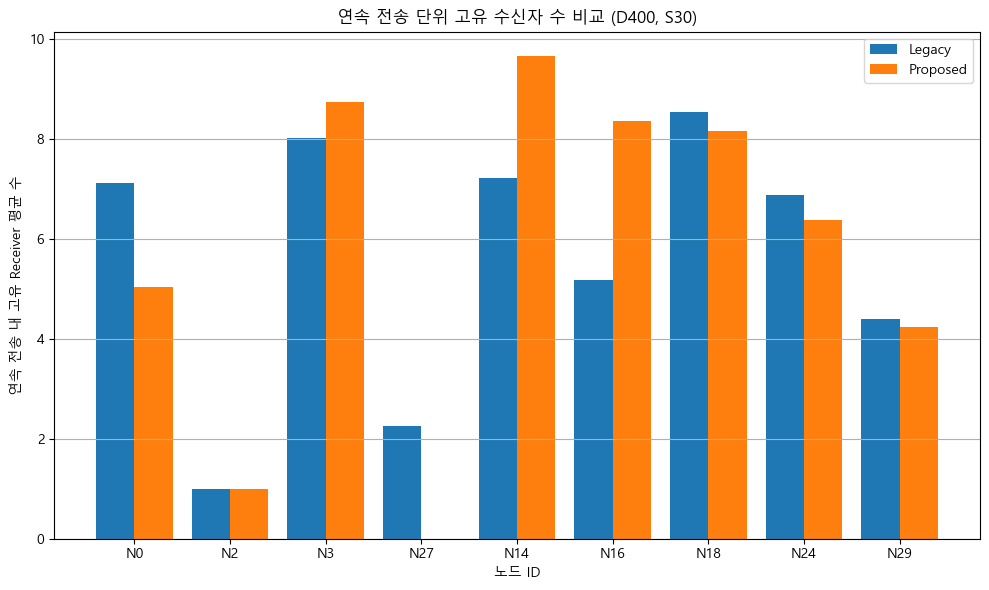

In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N27", "N14", "N16", "N18", "N24", "N29"]
methods = ['L', 'P']
result = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        node_id = node[1:]
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_drop_log.csv")
        if not os.path.exists(file_path):
            result[method].append(0)
            continue

        df = pd.read_csv(file_path)

        sender_col = df.columns[3]
        receiver_col = df.columns[4]

        df = df[[sender_col, receiver_col]].copy()
        df['group'] = (df[sender_col] != df[sender_col].shift()).cumsum()
        #print(df)

        group_receiver_counts = df.groupby('group').agg({
            sender_col: 'first',
            receiver_col: lambda x: len(set(x))
        })

        target_sender = int(node_id)
        node_groups = group_receiver_counts[group_receiver_counts[sender_col] == target_sender]

        avg_unique_receivers = node_groups[receiver_col].mean() if not node_groups.empty else 0
        result[method].append(avg_unique_receivers)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar(x, result['L'], width=0.4, label='Legacy', align='center')
plt.bar([i + 0.4 for i in x], result['P'], width=0.4, label='Proposed', align='center')
plt.xticks([i + 0.2 for i in x], nodes)
plt.ylabel("연속 전송 내 고유 Receiver 평균 수")
plt.xlabel("노드 ID")
plt.title(f"연속 전송 단위 고유 수신자 수 비교 ({density}, {speed})")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2384586743.py:26: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_L = pd.read_csv(file_L, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2384586743.py:27: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_P = pd.read_csv(file_P, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2384586743.py:26: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_L = pd.read_csv(file_L, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2384586743.py:27: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_P = pd.read_csv(file_P, names=columns, header=None)


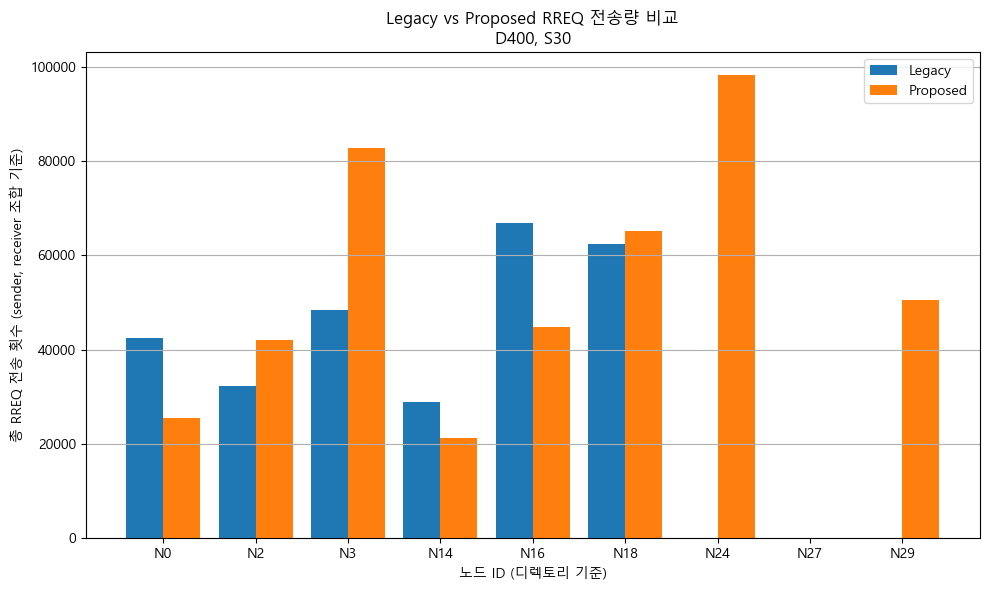

In [32]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# 실험 디렉토리 설정
base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N14", "N16", "N18", "N24", "N27", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'x', 'y', 'z', 'Nearby', 'Total']

# 결과 저장
legacy_counts = []
proposed_counts = []

for node in nodes:
    file_L = os.path.join(base_path, "L", density, speed, node, "sinr_drop_log.csv")
    file_P = os.path.join(base_path, "P", density, speed, node, "sinr_drop_log.csv")

    if not os.path.exists(file_L) or not os.path.exists(file_P):
        legacy_counts.append(0)
        proposed_counts.append(0)
        continue

    # 파일 읽기
    df_L = pd.read_csv(file_L, names=columns, header=None)
    df_P = pd.read_csv(file_P, names=columns, header=None)

    # RREQ만 필터링
    df_L = df_L[df_L['Packet'].astype(str).str.contains("Rreq", na=False)].copy()
    df_P = df_P[df_P['Packet'].astype(str).str.contains("Rreq", na=False)].copy()

    # 송수신자 조합 단위로 count 합계
    legacy_total = df_L.groupby(['sender', 'receiver']).size().sum()
    proposed_total = df_P.groupby(['sender', 'receiver']).size().sum()

    legacy_counts.append(legacy_total)
    proposed_counts.append(proposed_total)

# 시각화
x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], legacy_counts, width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], proposed_counts, width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("총 RREQ 전송 횟수 (sender, receiver 조합 기준)")
plt.xlabel("노드 ID (디렉토리 기준)")
plt.title(f"Legacy vs Proposed RREQ 전송량 비교\n{density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\131609402.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\131609402.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\131609402.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\131609402.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\

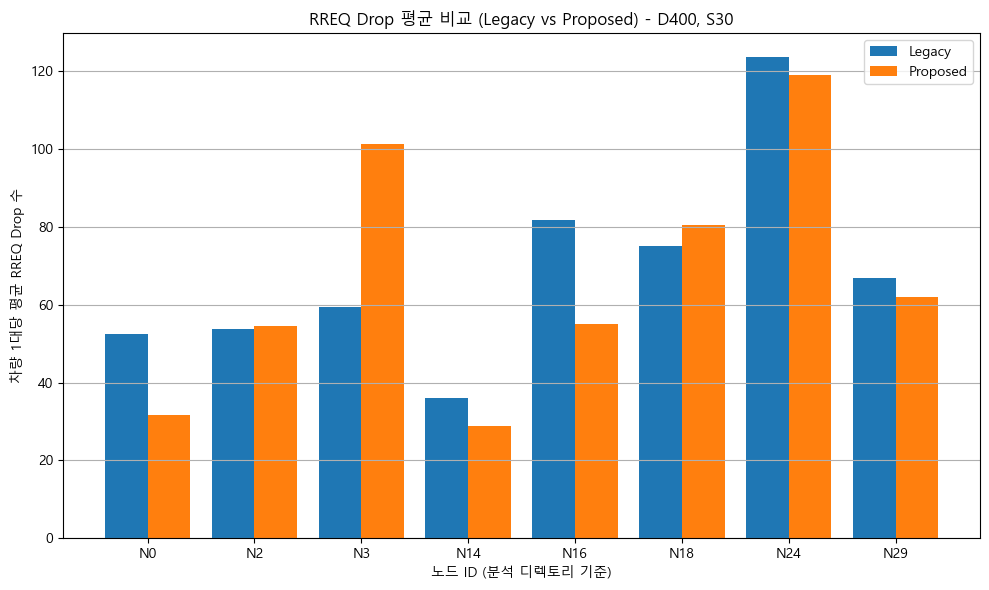

In [41]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rreq", na=False)].copy()

        df['Success'] = df['Success'].astype(str)
        senders = df['sender'].unique()
        drops = df[df['Success'] == "False"]
        avg_drop = len(drops) / len(senders) if len(senders) > 0 else 0
        results[method].append(avg_drop)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("차량 1대당 평균 RREQ Drop 수")
plt.xlabel("노드 ID (분석 디렉토리 기준)")
plt.title(f"RREQ Drop 평균 비교 (Legacy vs Proposed) - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\3739070688.py:22: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\3739070688.py:22: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\3739070688.py:22: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\3739070688.py:22: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppD

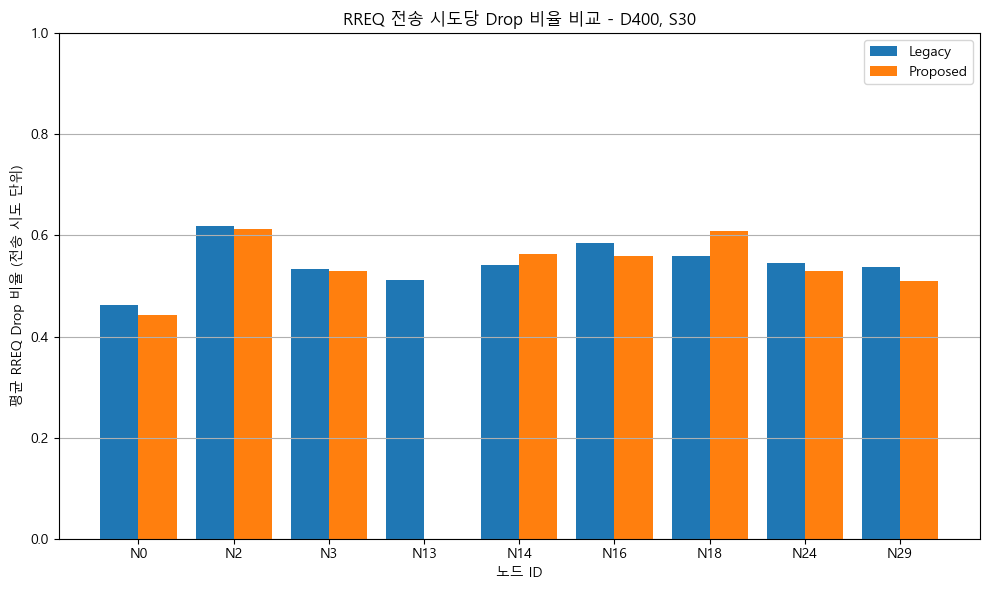

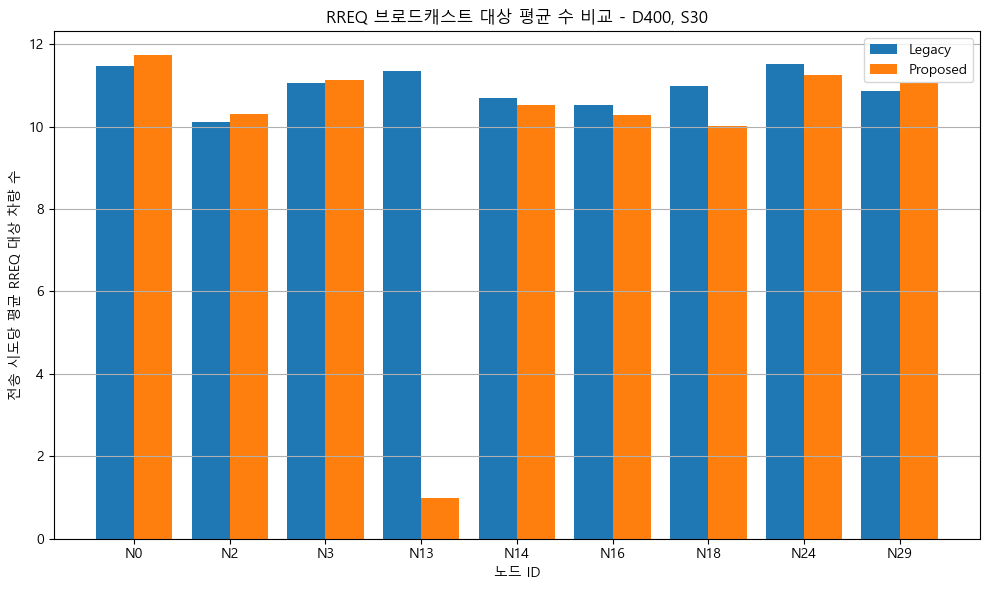

In [60]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_drop_rate = {'L': [], 'P': []}
results_avg_receivers = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_drop_rate[method].append(0)
            results_avg_receivers[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rreq", na=False)].copy()
        df['Success'] = df['Success'].astype(str)

        df['group'] = (df['sender'] != df['sender'].shift()).cumsum()

        group_drop_rate = df.groupby('group').apply(
            lambda g: (g['Success'] == 'False').sum() / len(g) if len(g) > 0 else 0
        )
        avg_drop_rate = group_drop_rate.mean() if not group_drop_rate.empty else 0
        results_drop_rate[method].append(avg_drop_rate)

        group_receivers = df.groupby('group')['receiver'].agg(lambda x: len(set(x)))
        avg_receivers = group_receivers.mean() if not group_receivers.empty else 0
        results_avg_receivers[method].append(avg_receivers)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_drop_rate['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_drop_rate['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("평균 RREQ Drop 비율 (전송 시도 단위)")
plt.xlabel("노드 ID")
plt.title(f"RREQ 전송 시도당 Drop 비율 비교 - {density}, {speed}")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_avg_receivers['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_avg_receivers['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("전송 시도당 평균 RREQ 대상 차량 수")
plt.xlabel("노드 ID")
plt.title(f"RREQ 브로드캐스트 대상 평균 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\617314267.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\617314267.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\617314267.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\617314267.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\

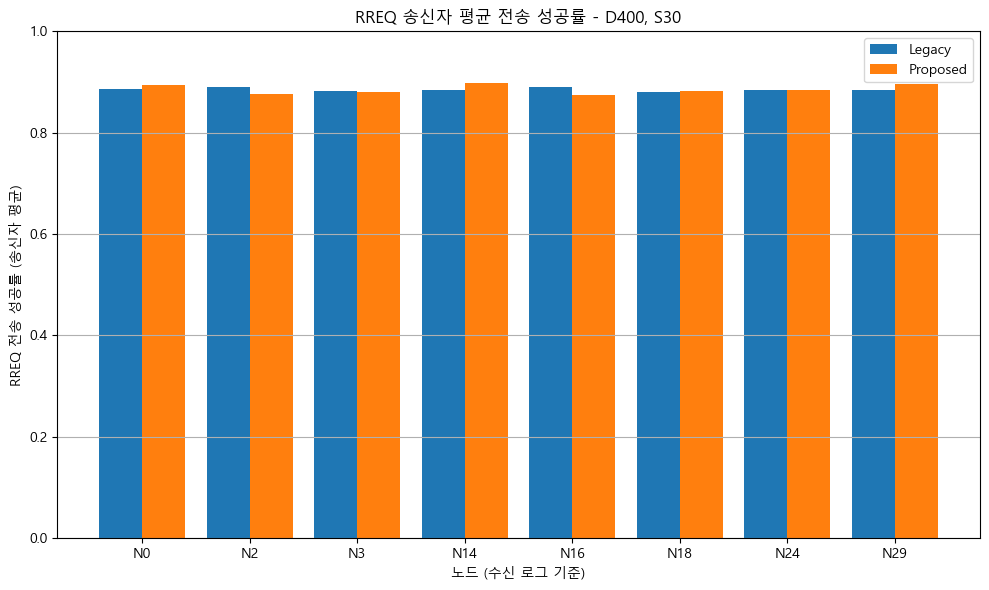

In [61]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_mean_rreq_success_ratio = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_mean_rreq_success_ratio[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rreq", na=False)].copy()
        df['Success'] = df['Success'].astype(str)
        df['Time'] = df['Time'].astype(float).round(6)

        # 그룹: sender + time + packet
        df['group'] = df['Time'].astype(str) + "_" + df['Packet'] + "_" + df['sender'].astype(str)
        grouped = df.groupby('group')

        # sender 기준 성공률 계산
        sender_stats = {}
        for group_id, group in grouped:
            sender = group['sender'].iloc[0]
            if sender not in sender_stats:
                sender_stats[sender] = [0, 0]  # [success, total]
            sender_stats[sender][1] += 1
            if (group['Success'] == 'True').any():
                sender_stats[sender][0] += 1

        sender_ratios = [succ / total for succ, total in sender_stats.values() if total > 0]
        mean_success_ratio = sum(sender_ratios) / len(sender_ratios) if sender_ratios else 0
        results_mean_rreq_success_ratio[method].append(mean_success_ratio)

# 시각화
x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_mean_rreq_success_ratio['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_mean_rreq_success_ratio['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("RREQ 전송 성공률 (송신자 평균)")
plt.xlabel("노드 (수신 로그 기준)")
plt.title(f"RREQ 송신자 평균 전송 성공률 - {density}, {speed}")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\308571012.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\308571012.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\308571012.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\308571012.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\

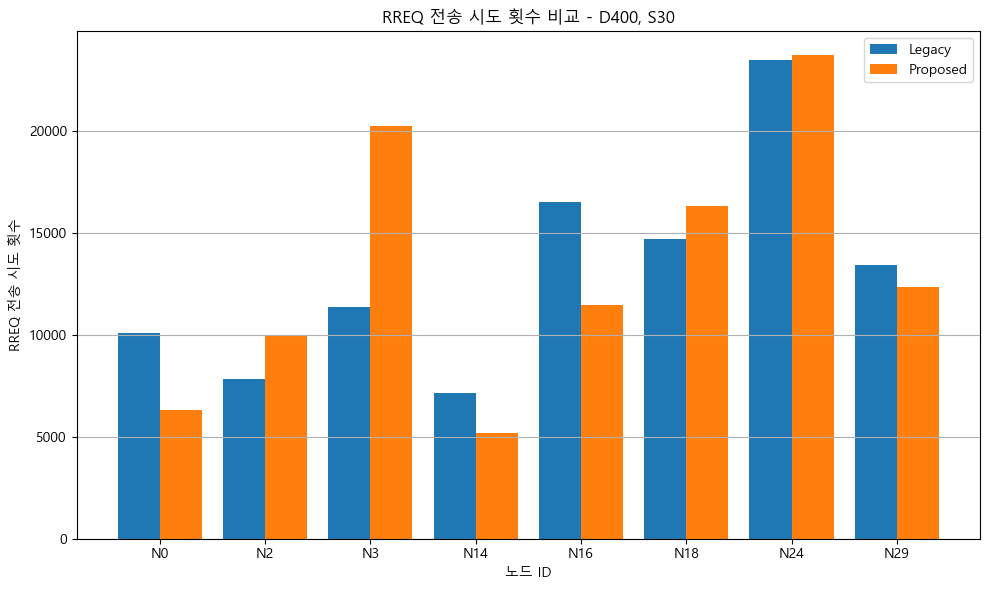

In [42]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_rreq_attempts = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_rreq_attempts[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rreq", na=False)].copy()

        df['group'] = (df['sender'] != df['sender'].shift()).cumsum()
        rreq_attempt_count = df['group'].nunique()
        results_rreq_attempts[method].append(rreq_attempt_count)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_rreq_attempts['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_rreq_attempts['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("RREQ 전송 시도 횟수")
plt.xlabel("노드 ID")
plt.title(f"RREQ 전송 시도 횟수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\1170792621.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\1170792621.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\1170792621.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\1170792621.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppD

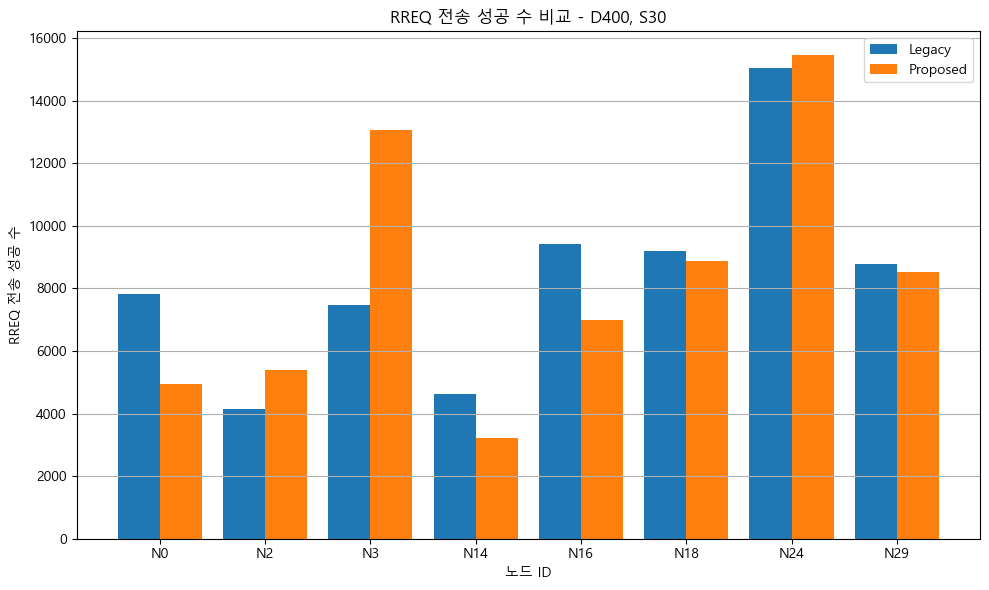

In [43]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_rreq_success = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_rreq_success[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rreq", na=False)].copy()
        df['Success'] = df['Success'].astype(str)
        df['group'] = (df['sender'] != df['sender'].shift()).cumsum()

        group_success = df.groupby('group')['Success'].apply(lambda x: (x == 'True').any())
        success_count = group_success.sum()
        results_rreq_success[method].append(success_count)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_rreq_success['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_rreq_success['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("RREQ 전송 성공 수")
plt.xlabel("노드 ID")
plt.title(f"RREQ 전송 성공 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\893230494.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\893230494.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\893230494.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\893230494.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\

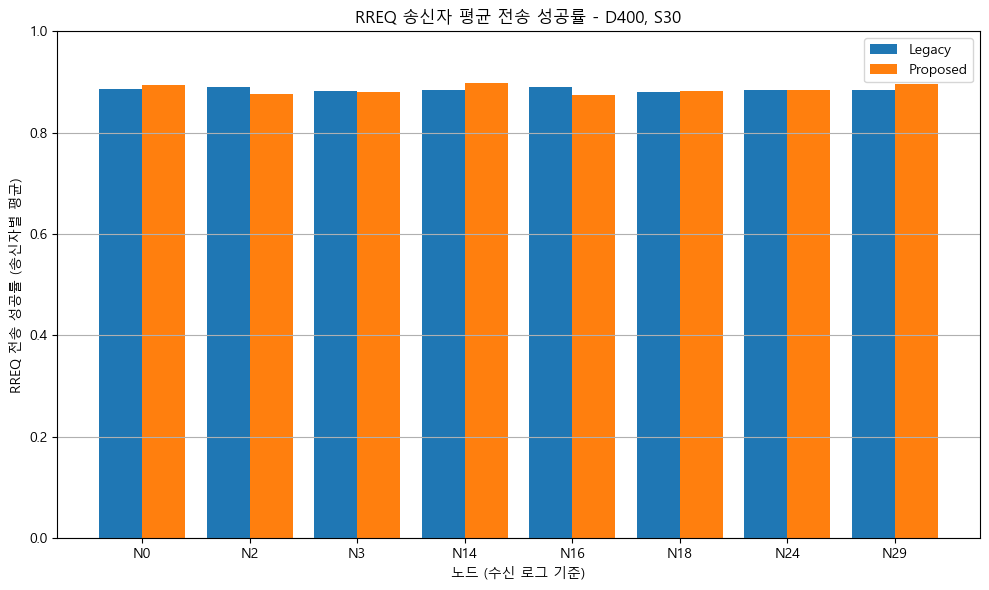

In [62]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_mean_rreq_success_ratio = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_mean_rreq_success_ratio[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rreq", na=False)].copy()
        df['Success'] = df['Success'].astype(str)
        df['Time'] = df['Time'].astype(float).round(6)
        df['group'] = df['Time'].astype(str) + "_" + df['Packet'] + "_" + df['sender'].astype(str)

        grouped = df.groupby('group')

        # 송신자별 전송 시도 수, 성공 수 개별 카운트
        sender_stats = {}
        for group_id, group in grouped:
            sender = group['sender'].iloc[0]
            if sender not in sender_stats:
                sender_stats[sender] = [0, 0]  # [success_count, total_count]
            sender_stats[sender][1] += 1  # 전송 시도 수
            if (group['Success'] == 'True').any():
                sender_stats[sender][0] += 1  # 성공 수

        # 송신자별 성공률 평균
        sender_success_ratios = [
            success / total for success, total in sender_stats.values() if total > 0
        ]
        mean_success_ratio = (
            sum(sender_success_ratios) / len(sender_success_ratios)
            if sender_success_ratios else 0
        )
        results_mean_rreq_success_ratio[method].append(mean_success_ratio)

# 시각화
x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_mean_rreq_success_ratio['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_mean_rreq_success_ratio['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("RREQ 전송 성공률 (송신자별 평균)")
plt.xlabel("노드 (수신 로그 기준)")
plt.title(f"RREQ 송신자 평균 전송 성공률 - {density}, {speed}")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\1093651869.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\1093651869.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\1093651869.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\1093651869.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppD

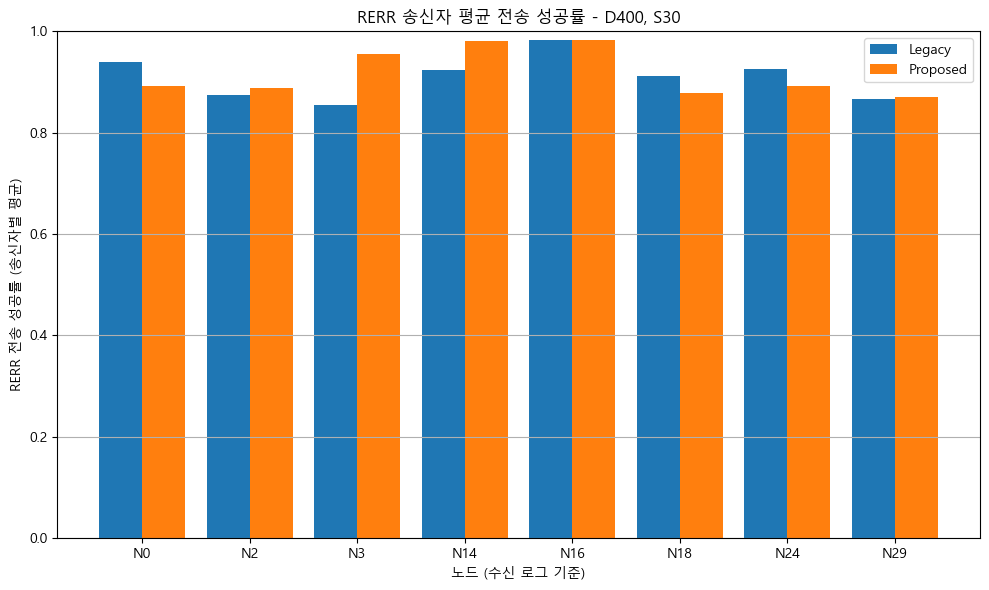

In [63]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_mean_rerr_success_ratio = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_mean_rerr_success_ratio[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rerr", na=False)].copy()
        df['Success'] = df['Success'].astype(str)
        df['Time'] = df['Time'].astype(float).round(6)
        df['group'] = df['Time'].astype(str) + "_" + df['Packet'] + "_" + df['sender'].astype(str)

        grouped = df.groupby('group')

        sender_stats = {}
        for group_id, group in grouped:
            sender = group['sender'].iloc[0]
            if sender not in sender_stats:
                sender_stats[sender] = [0, 0]  # [success_count, total_count]
            sender_stats[sender][1] += 1  # 전송 시도 수
            if (group['Success'] == 'True').any():
                sender_stats[sender][0] += 1  # 성공 수

        sender_success_ratios = [
            success / total for success, total in sender_stats.values() if total > 0
        ]
        mean_success_ratio = (
            sum(sender_success_ratios) / len(sender_success_ratios)
            if sender_success_ratios else 0
        )
        results_mean_rerr_success_ratio[method].append(mean_success_ratio)

# 시각화
x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_mean_rerr_success_ratio['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_mean_rerr_success_ratio['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("RERR 전송 성공률 (송신자별 평균)")
plt.xlabel("노드 (수신 로그 기준)")
plt.title(f"RERR 송신자 평균 전송 성공률 - {density}, {speed}")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\469882015.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\469882015.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\469882015.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\469882015.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\

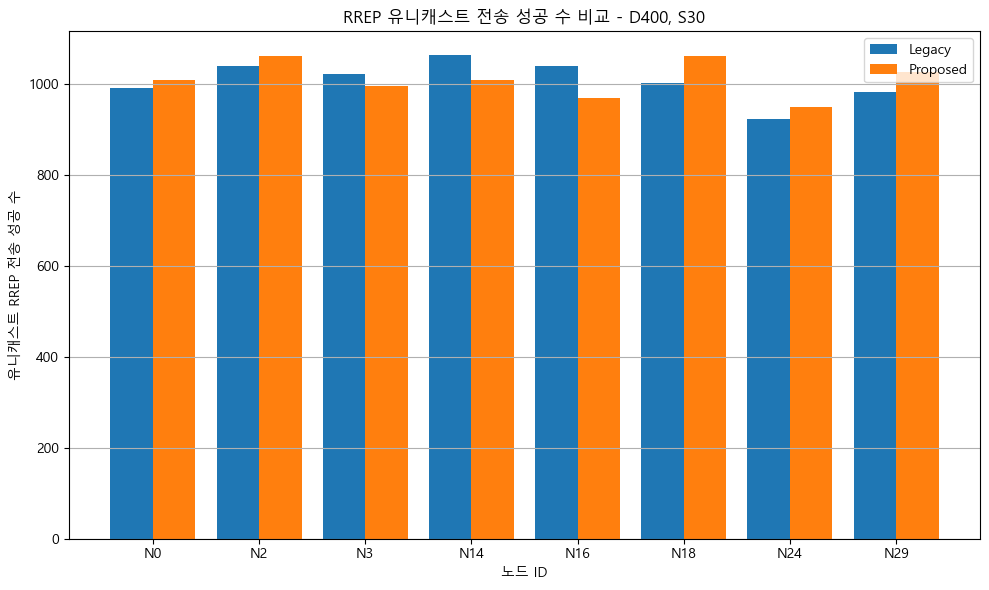

In [47]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_unicast_rrep_success = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_unicast_rrep_success[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rrep", na=False)].copy()
        df['Success'] = df['Success'].astype(str)
        df['Time'] = df['Time'].astype(float).round(6)

        df['group'] = df['Time'].astype(str) + "_" + df['Packet'].astype(str) + "_" + df['sender'].astype(str)

        grouped = df.groupby('group')
        is_unicast = grouped['receiver'].nunique() == 1

        unicast_groups = is_unicast[is_unicast].index
        unicast_success_flags = grouped['Success'].apply(lambda x: (x == 'True').any())
        success_count = unicast_success_flags[unicast_success_flags.index.isin(unicast_groups)].sum()

        results_unicast_rrep_success[method].append(success_count)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_unicast_rrep_success['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_unicast_rrep_success['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("유니캐스트 RREP 전송 성공 수")
plt.xlabel("노드 ID")
plt.title(f"RREP 유니캐스트 전송 성공 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\3169937817.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\3169937817.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\3169937817.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\3169937817.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppD

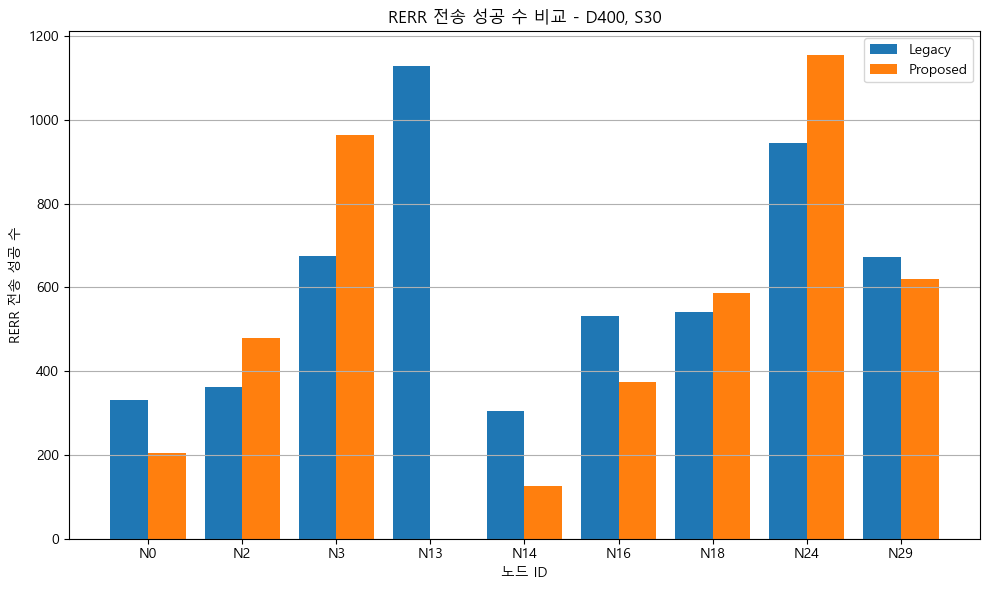

In [108]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_rerr_success = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_rerr_success[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("arpREQ", na=False)].copy()
        df['Success'] = df['Success'].astype(str)
        df['Time'] = df['Time'].astype(float).round(6)

        df['group'] = df['Time'].astype(str) + "_" + df['Packet'].astype(str) + "_" + df['sender'].astype(str)

        grouped = df.groupby('group')
        success_flags = grouped['Success'].apply(lambda x: (x == 'True').any())
        success_count = success_flags.sum()

        results_rerr_success[method].append(success_count)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_rerr_success['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_rerr_success['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("RERR 전송 성공 수")
plt.xlabel("노드 ID")
plt.title(f"RERR 전송 성공 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2866310053.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2866310053.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2866310053.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2866310053.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppD

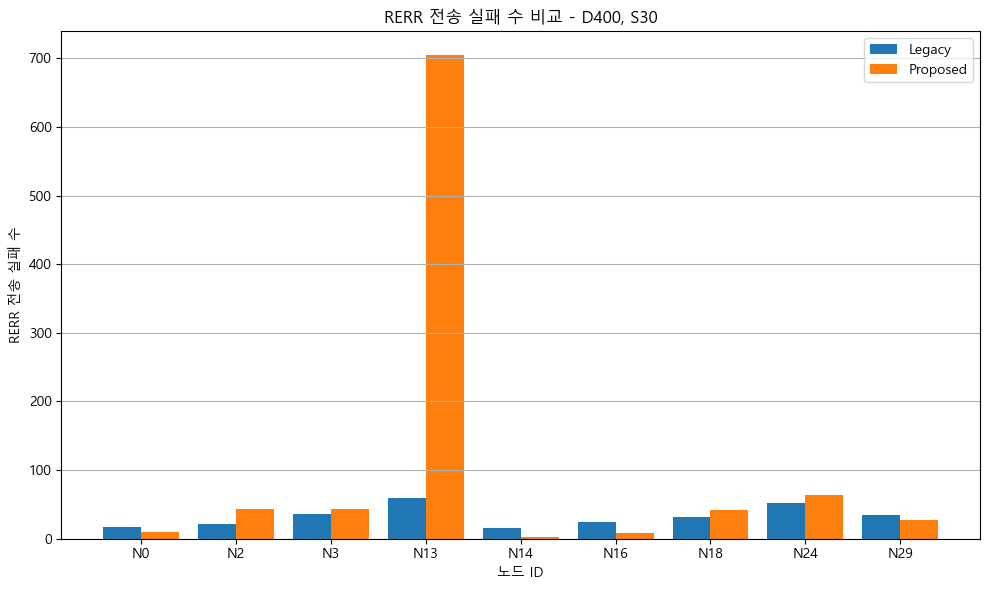

In [105]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_rerr_fail = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_rerr_fail[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("arpREPLY", na=False)].copy()
        df['Success'] = df['Success'].astype(str)
        df['Time'] = df['Time'].astype(float).round(6)
        df['group'] = df['Time'].astype(str) + "_" + df['Packet'].astype(str) + "_" + df['sender'].astype(str)

        grouped = df.groupby('group')
        fail_flags = grouped['Success'].apply(lambda x: (x == 'True').sum() == 0)
        fail_count = fail_flags.sum()

        results_rerr_fail[method].append(fail_count)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_rerr_fail['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_rerr_fail['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("RERR 전송 실패 수")
plt.xlabel("노드 ID")
plt.title(f"RERR 전송 실패 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2786180043.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2786180043.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2786180043.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2786180043.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppD

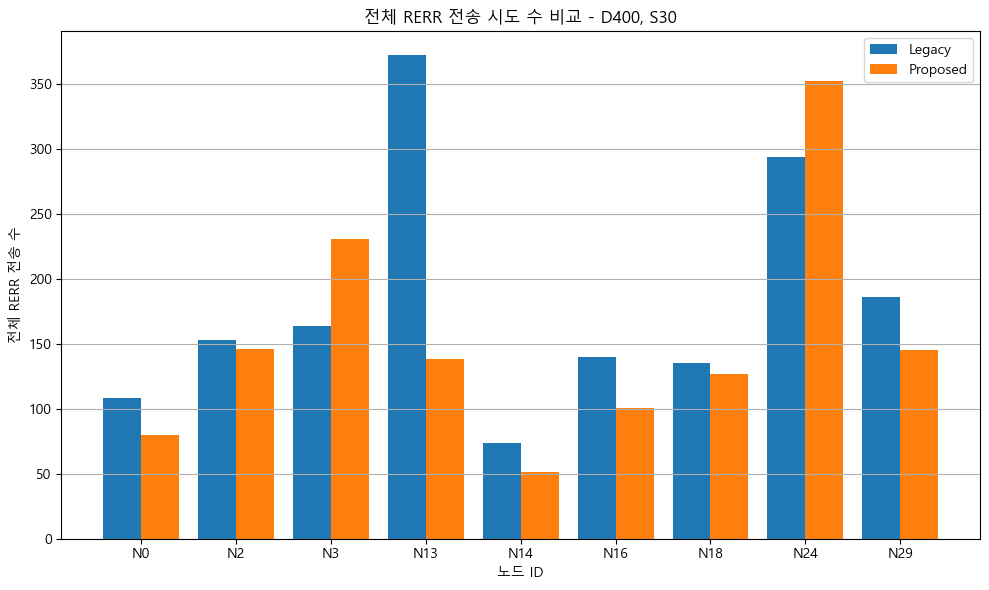

In [104]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_rerr_total = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_rerr_total[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rerr", na=False)].copy()
        df['Time'] = df['Time'].astype(float).round(6)
        df['group'] = df['Time'].astype(str) + "_" + df['Packet'].astype(str) + "_" + df['sender'].astype(str)

        total_rerr = df['group'].nunique()
        results_rerr_total[method].append(total_rerr)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_rerr_total['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_rerr_total['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("전체 RERR 전송 수")
plt.xlabel("노드 ID")
plt.title(f"전체 RERR 전송 시도 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2000063693.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2000063693.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2000063693.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2000063693.py:20: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, names=columns, header=None)
C:\Users\Choe JongHyeon\AppD

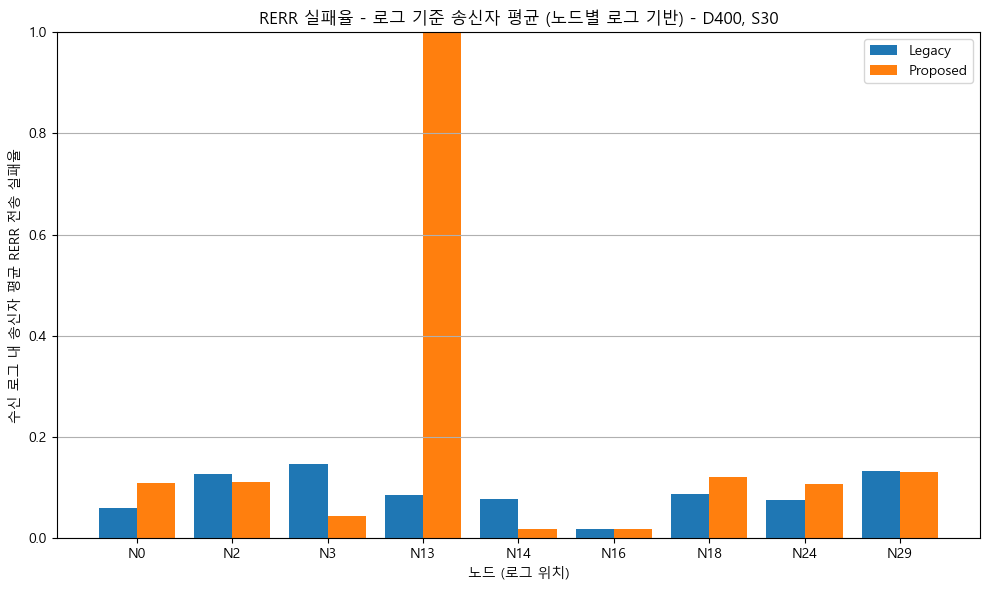

In [57]:
import pandas as pd
import os
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'Success']
methods = ['L', 'P']
results_mean_rerr_fail_ratio = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_mean_rerr_fail_ratio[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None)
        df = df[df['Packet'].astype(str).str.contains("Rerr", na=False)].copy()
        df['Success'] = df['Success'].astype(str)
        df['Time'] = df['Time'].astype(float).round(6)

        df['group'] = df['Time'].astype(str) + "_" + df['Packet'] + "_" + df['sender'].astype(str)

        sender_stats = {}
        for group_id, group in df.groupby('group'):
            sender = group['sender'].iloc[0]
            if sender not in sender_stats:
                sender_stats[sender] = [0, 0]  # [fail, total]
            sender_stats[sender][1] += 1
            if (group['Success'] == 'True').sum() == 0:
                sender_stats[sender][0] += 1

        sender_ratios = [fail / total for fail, total in sender_stats.values() if total > 0]
        mean_fail_ratio = sum(sender_ratios) / len(sender_ratios) if sender_ratios else 0
        results_mean_rerr_fail_ratio[method].append(mean_fail_ratio)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_mean_rerr_fail_ratio['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_mean_rerr_fail_ratio['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("수신 로그 내 송신자 평균 RERR 전송 실패율")
plt.xlabel("노드 (로그 위치)")
plt.title(f"RERR 실패율 - 로그 기준 송신자 평균 (노드별 로그 기반) - {density}, {speed}")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


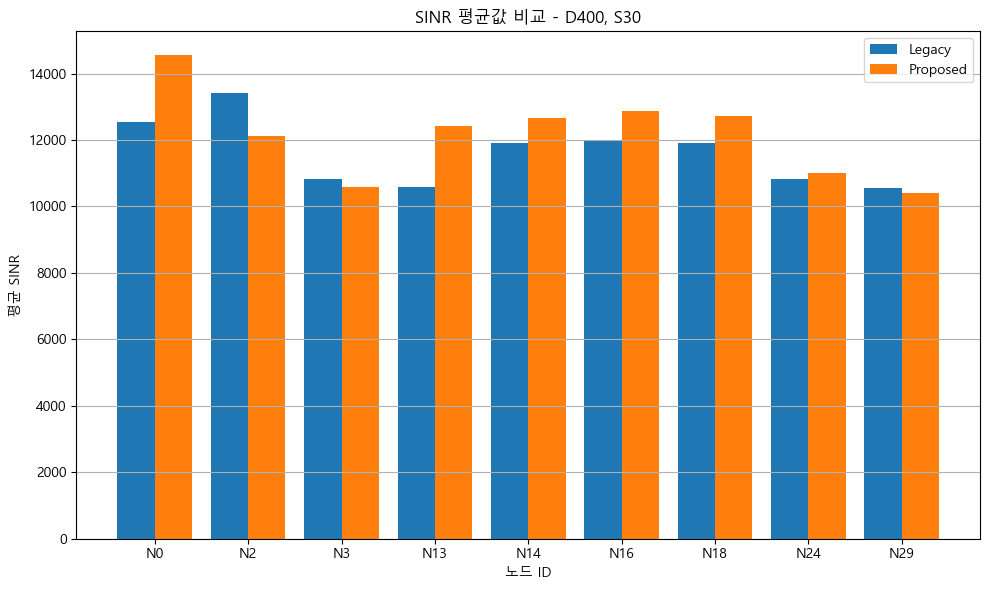

In [70]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'x', 'y', 'z', 'Nearby', 'Total']
methods = ['L', 'P']
results_mean_sinr = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results_mean_sinr[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None, dtype=str)
        df['SINR'] = pd.to_numeric(df['SINR'], errors='coerce')
        df = df.dropna(subset=['SINR'])

        mean_sinr = df['SINR'].mean()
        results_mean_sinr[method].append(mean_sinr)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_mean_sinr['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_mean_sinr['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("평균 SINR")
plt.xlabel("노드 ID")
plt.title(f"SINR 평균값 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


[P/N13] 누락된 컬럼: ['30.000701538029', '4652.14', 'aodv::Rreq', 'Unnamed: 3']


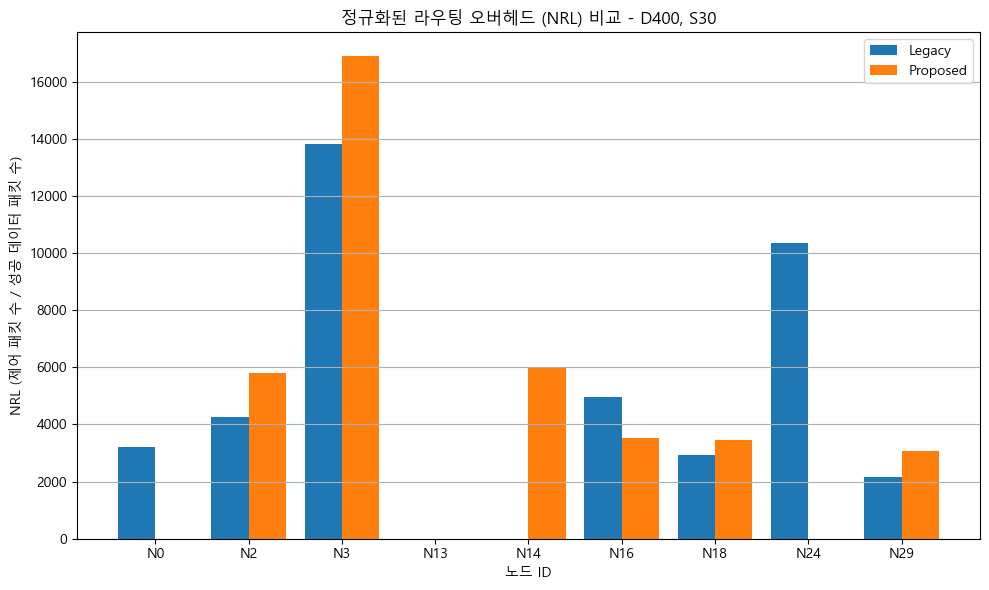

In [154]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]
results = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            print(f"[{method}/{node}] 파일 없음")
            results[method].append(float('inf'))
            continue

        df = pd.read_csv(file_path, header=0)
        df.columns = df.columns.str.strip()

        if 'Packet' not in df.columns or 'Success' not in df.columns:
            print(f"[{method}/{node}] 누락된 컬럼: {df.columns.tolist()}")
            results[method].append(float('inf'))
            continue

        df['Packet'] = df['Packet'].astype(str)
        df['Success'] = df['Success'].astype(str).str.lower() == 'true'

        ctrl_count = df['Packet'].str.contains("aodv::Rreq|aodv::Rrep|aodv::Rerr", na=False).sum()

        data_success_count = df[(df['Packet'].str.contains("ping0-reply", na=False)) & (df['Success'])].shape[0]

        nrl = ctrl_count / data_success_count if data_success_count > 0 else float('inf')
        results[method].append(nrl)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("NRL (제어 패킷 수 / 성공 데이터 패킷 수)")
plt.xlabel("노드 ID")
plt.title(f"정규화된 라우팅 오버헤드 (NRL) 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_83672\1878354867.py:59: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  plt.tight_layout()
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_83672\1878354867.py:59: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  plt.tight_layout()
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_83672\1878354867.py:59: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_83672\1878354867.py:59: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  plt.tight_layout()
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_83672\1878354867.py:59: UserWarning: Glyph 50773 (\N{HANGUL SYLLABLE WANG}) missing from current font.
  plt.tight_layout()
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_83672\1878354867.py:59: UserWarning: Glyph 48373 (\N{HANGUL SYL

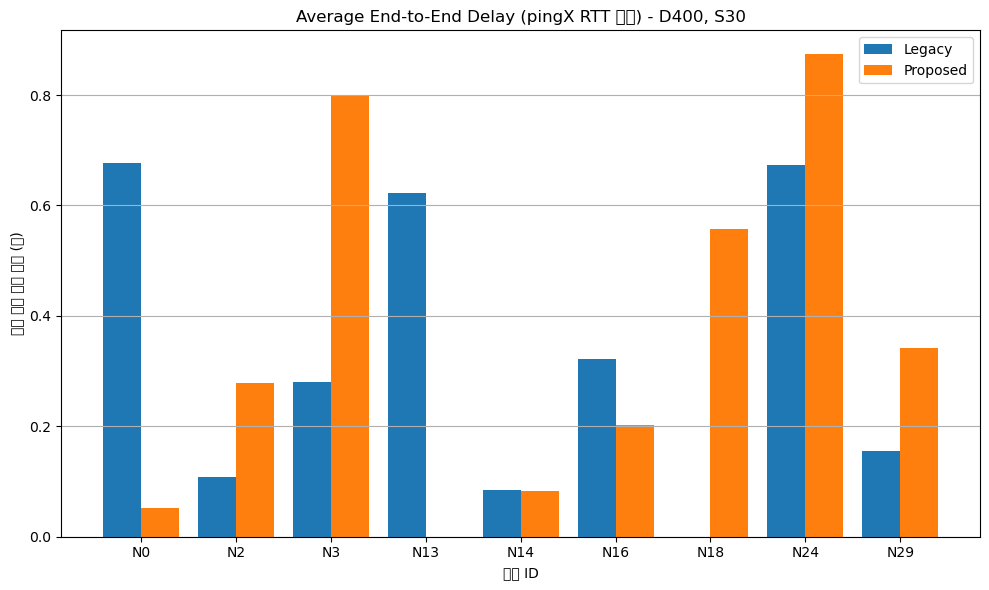

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]
results = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results[method].append(0)
            continue

        df = pd.read_csv(file_path, header=0)
        df.columns = df.columns.str.strip()

        if 'Packet' not in df.columns or 'Sender' not in df.columns or 'Receiver' not in df.columns or 'Time' not in df.columns or 'Success' not in df.columns:
            results[method].append(0)
            continue

        df['Packet'] = df['Packet'].astype(str)
        df['Success'] = df['Success'].astype(str).str.lower() == 'true'
        df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
        df = df.dropna(subset=['Time'])

        ping_tx = df[df['Packet'].str.match(r'ping\d+$')]
        ping_rx = df[df['Packet'].str.match(r'ping\d+-reply$') & df['Success']]

        ping_tx = ping_tx.copy()
        ping_rx = ping_rx.copy()
        ping_tx['PktName'] = ping_tx['Packet']
        ping_rx['PktName'] = ping_rx['Packet'].str.replace("-reply", "", regex=False)

        tx_dict = ping_tx.set_index('PktName')['Time'].to_dict()
        rx_dict = ping_rx.set_index('PktName')['Time'].to_dict()

        delays = []
        for pkt in set(tx_dict.keys()) & set(rx_dict.keys()):
            delays.append(rx_dict[pkt] - tx_dict[pkt])

        avg_delay = sum(delays) / len(delays) if delays else 0
        results[method].append(avg_delay)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("평균 왕복 지연 시간 (초)")
plt.xlabel("노드 ID")
plt.title(f"Average End-to-End Delay (pingX RTT 기반) - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


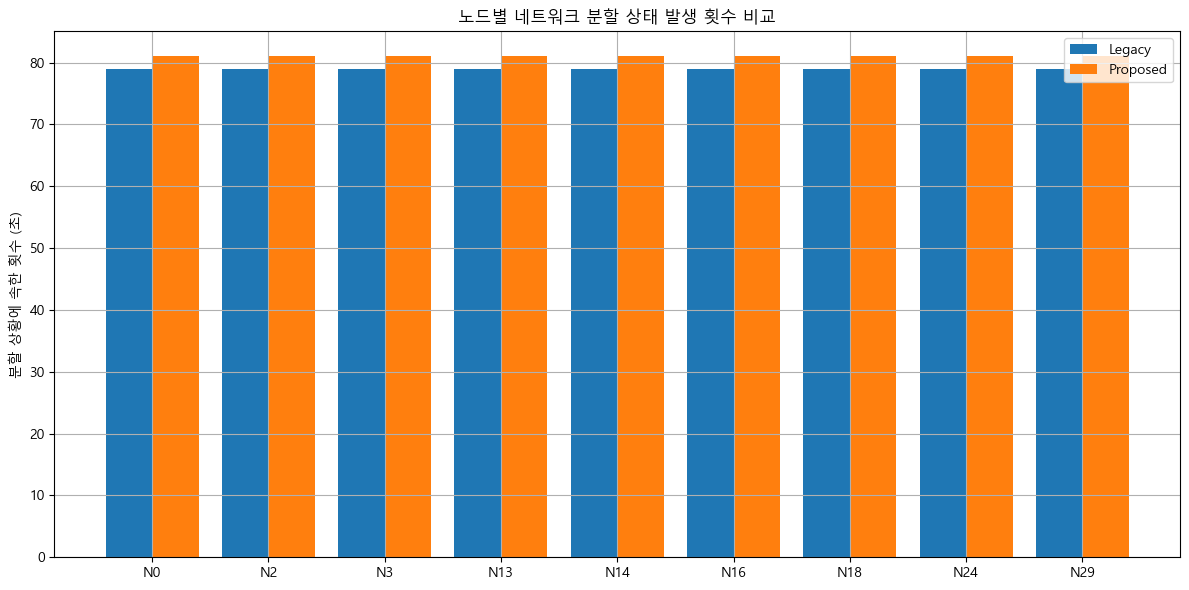

In [165]:
import os
import pandas as pd
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt

# 설정
base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

# 결과 저장
partition_count = {method: {n: 0 for n in nodes} for method in methods}

for method in methods:
    time_edges = defaultdict(list)

    # 로그 수집
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "aodv_routing_log.csv")
        if not os.path.exists(file_path):
            continue

        df = pd.read_csv(file_path)
        df.columns = df.columns.str.strip()
        df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
        df['Node'] = df['Node'].astype(str)
        df['Destination'] = df['Destination'].astype(str)
        df['New_LifeTime'] = pd.to_numeric(df['New_LifeTime'], errors='coerce')
        df = df.dropna(subset=['Time', 'Node', 'Destination', 'New_LifeTime'])

        for _, row in df.iterrows():
            t_start = int(row['Time'])
            t_end = int(row['New_LifeTime'])
            src = row['Node']
            dst = row['Destination']
            for t in range(t_start, t_end + 1):
                time_edges[t].append((src, dst))

    # 시간별 분할 여부 체크
    for t, edges in time_edges.items():
        G = nx.Graph()
        G.add_edges_from(edges)
        G.add_nodes_from([n.replace("N", "") for n in nodes])
        components = list(nx.connected_components(G))

        if len(components) <= 1:
            continue  # 분할 아님

        # 분할된 상황에 포함된 노드만 count 증가
        for comp in components:
            if len(comp) < len(nodes):  # 전체가 아니면 분할
                for n in comp:
                    node_full = f"N{n}"
                    if node_full in partition_count[method]:
                        partition_count[method][node_full] += 1

# 막대그래프 출력
x = range(len(nodes))
legacy_values = [partition_count['L'][n] for n in nodes]
proposed_values = [partition_count['P'][n] for n in nodes]

plt.figure(figsize=(12, 6))
plt.bar([i - 0.2 for i in x], legacy_values, width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], proposed_values, width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel('분할 상황에 속한 횟수 (초)')
plt.title('노드별 네트워크 분할 상태 발생 횟수 비교')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


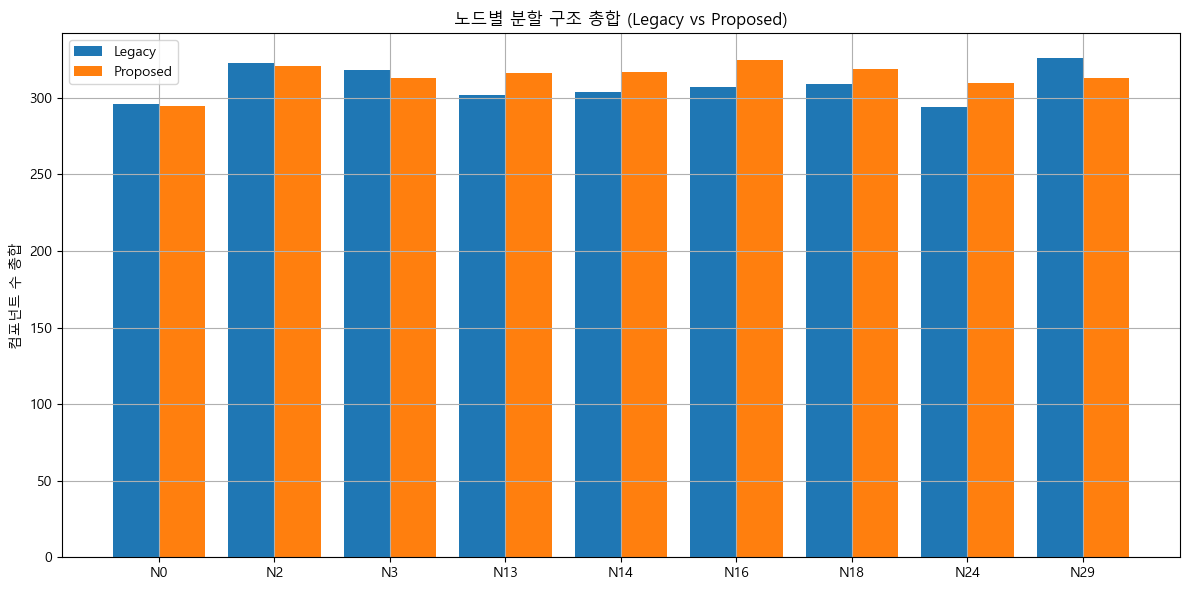

In [173]:
import os
import pandas as pd
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt

# 실험 공통 설정
base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
node_folders = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = {"L": "Legacy", "P": "Proposed"}

# 결과 저장
results = {m: {} for m in methods}

for method_code, method_name in methods.items():
    method_path = os.path.join(base_path, method_code, density, speed)

    for folder in node_folders:
        file_path = os.path.join(method_path, folder, "aodv_routing_log.csv")
        if not os.path.exists(file_path):
            print(f"파일 없음: {file_path}")
            continue

        df = pd.read_csv(file_path)
        df.columns = df.columns.str.strip()
        df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
        df['Node'] = df['Node'].astype(str)
        df['Destination'] = df['Destination'].astype(str)
        df['New_LifeTime'] = pd.to_numeric(df['New_LifeTime'], errors='coerce')
        df = df.dropna(subset=['Time', 'Node', 'Destination', 'New_LifeTime'])

        time_edges = defaultdict(list)
        for _, row in df.iterrows():
            t_start = int(row['Time'])
            t_end = int(row['New_LifeTime'])
            src = row['Node']
            dst = row['Destination']
            for t in range(t_start, t_end + 1):
                time_edges[t].append((src, dst))

        # 컴포넌트 수 총합
        comp_total = 0
        for t, edges in time_edges.items():
            G = nx.Graph()
            G.add_edges_from(edges)
            if G.number_of_edges() == 0:
                continue
            comp_total += nx.number_connected_components(G)

        results[method_code][folder] = comp_total

# 시각화
x = range(len(node_folders))
legacy_vals = [results["L"].get(f, 0) for f in node_folders]
proposed_vals = [results["P"].get(f, 0) for f in node_folders]

plt.figure(figsize=(12, 6))
plt.bar([i - 0.2 for i in x], legacy_vals, width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], proposed_vals, width=0.4, label='Proposed')
plt.xticks(x, node_folders)
plt.ylabel("컴포넌트 수 총합")
plt.title("노드별 분할 구조 총합 (Legacy vs Proposed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [174]:
import os
import pandas as pd
import networkx as nx
from collections import defaultdict

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = {"L": "Legacy", "P": "Proposed"}

degree_records = {m: [] for m in methods}

for method_code in methods:
    method_path = os.path.join(base_path, method_code, density, speed)
    time_edges = defaultdict(list)

    for node in nodes:
        file_path = os.path.join(method_path, node, "aodv_routing_log.csv")
        if not os.path.exists(file_path):
            continue

        df = pd.read_csv(file_path)
        df.columns = df.columns.str.strip()
        df = df.dropna(subset=['Time', 'Node', 'Destination', 'New_LifeTime'])
        df['Time'] = pd.to_numeric(df['Time'], errors='coerce').astype(int)
        df['New_LifeTime'] = pd.to_numeric(df['New_LifeTime'], errors='coerce').astype(int)
        df['Node'] = df['Node'].astype(str)
        df['Destination'] = df['Destination'].astype(str)

        for _, row in df.iterrows():
            for t in range(row['Time'], row['New_LifeTime'] + 1):
                time_edges[t].append((row['Node'], row['Destination']))

    for t, edges in time_edges.items():
        G = nx.Graph()
        G.add_edges_from(edges)
        degrees = dict(G.degree())
        degree_records[method_code].extend(degrees.values())



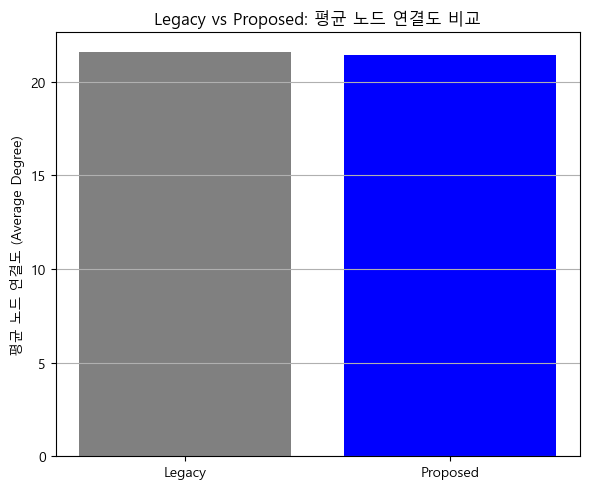

In [175]:
import numpy as np

# 평균 연결도 계산
legacy_mean = np.mean(degree_records["L"]) if degree_records["L"] else 0
proposed_mean = np.mean(degree_records["P"]) if degree_records["P"] else 0

# Bar plot
plt.figure(figsize=(6, 5))
plt.bar(["Legacy", "Proposed"], [legacy_mean, proposed_mean], color=["gray", "blue"])
plt.ylabel("평균 노드 연결도 (Average Degree)")
plt.title("Legacy vs Proposed: 평균 노드 연결도 비교")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


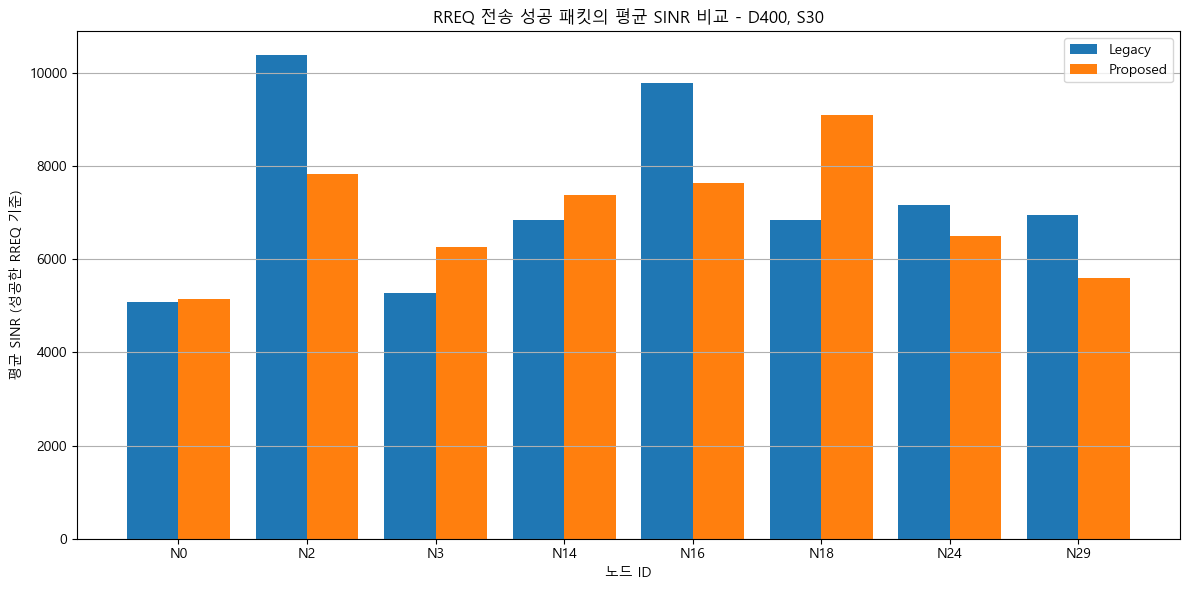

In [96]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'Sender', 'Receiver', 'Success']
methods = ['L', 'P']
mean_rreq_sinr = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            mean_rreq_sinr[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None, dtype=str)
        df['SINR'] = pd.to_numeric(df['SINR'], errors='coerce')
        df['Success'] = df['Success'].astype(str)
        df = df.dropna(subset=['SINR'])

        df = df[df['Packet'].str.contains("Rreq", na=False)]
        df = df[df['Success'].str.lower() == "true"]

        mean_sinr = df['SINR'].mean() if not df.empty else 0
        mean_rreq_sinr[method].append(mean_sinr)

x = np.arange(len(nodes))
plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, mean_rreq_sinr['L'], width=0.4, label='Legacy')
plt.bar(x + 0.2, mean_rreq_sinr['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("평균 SINR (성공한 RREQ 기준)")
plt.xlabel("노드 ID")
plt.title(f"RREQ 전송 성공 패킷의 평균 SINR 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


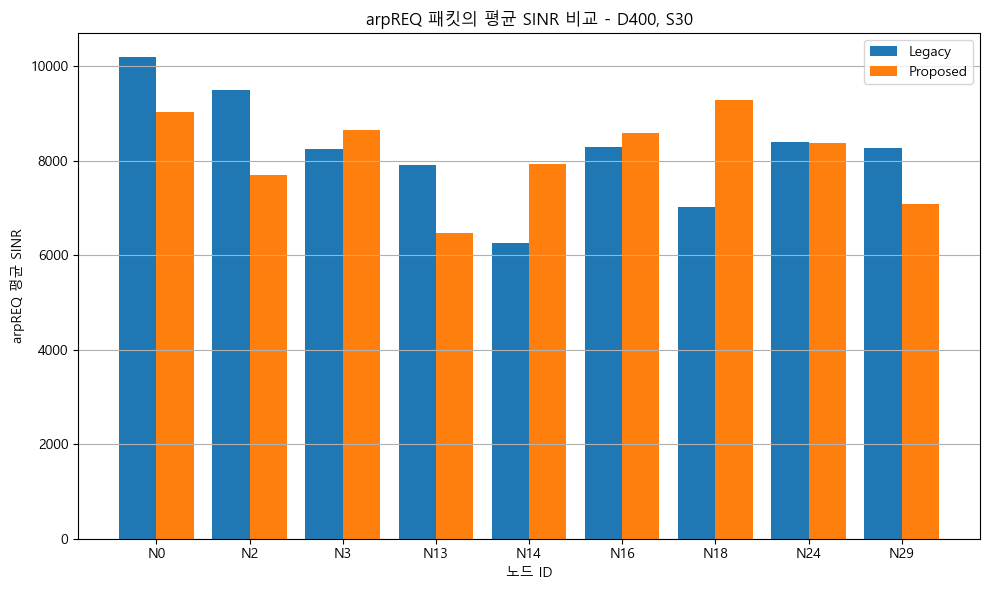

In [111]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'x', 'y', 'z', 'Nearby', 'Total']
results = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results[method].append(None)
            continue

        df = pd.read_csv(file_path, names=columns, header=None, dtype=str)
        df = df[df['Packet'].str.contains("arpREQ", na=False)].copy()
        df['SINR'] = pd.to_numeric(df['SINR'], errors='coerce')
        df = df.dropna(subset=['SINR'])

        mean_sinr = df['SINR'].mean() if not df.empty else None
        results[method].append(mean_sinr)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("arpREQ 평균 SINR")
plt.xlabel("노드 ID")
plt.title(f"arpREQ 패킷의 평균 SINR 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


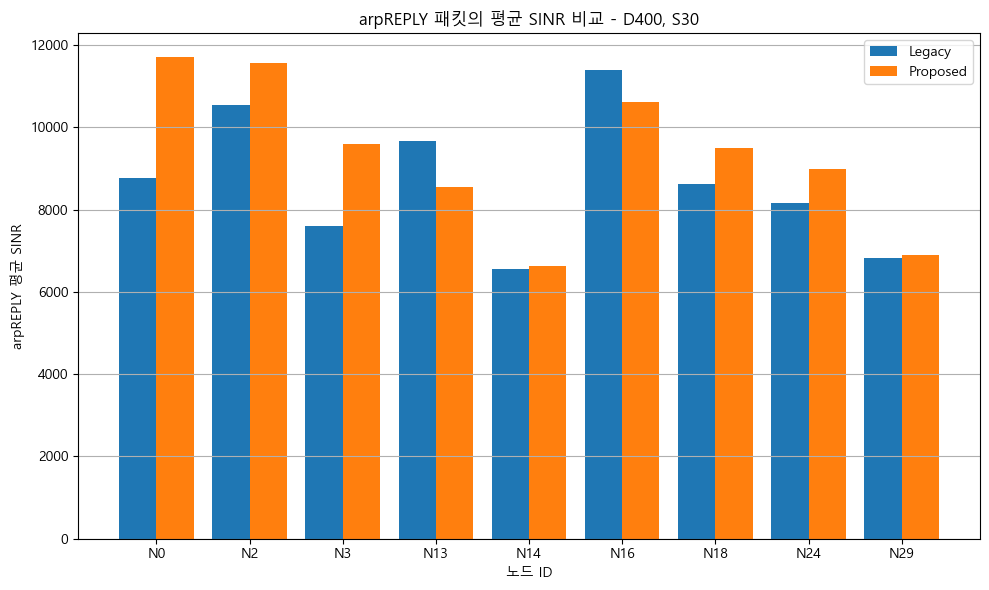

In [113]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'nodeId']
results = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results[method].append(None)
            continue

        df = pd.read_csv(file_path, names=columns, header=None, dtype=str)
        df = df[df['Packet'].str.contains("arpREPLY", na=False)].copy()
        df['SINR'] = pd.to_numeric(df['SINR'], errors='coerce')
        df = df.dropna(subset=['SINR'])

        mean_sinr = df['SINR'].mean() if not df.empty else None
        results[method].append(mean_sinr)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("arpREPLY 평균 SINR")
plt.xlabel("노드 ID")
plt.title(f"arpREPLY 패킷의 평균 SINR 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


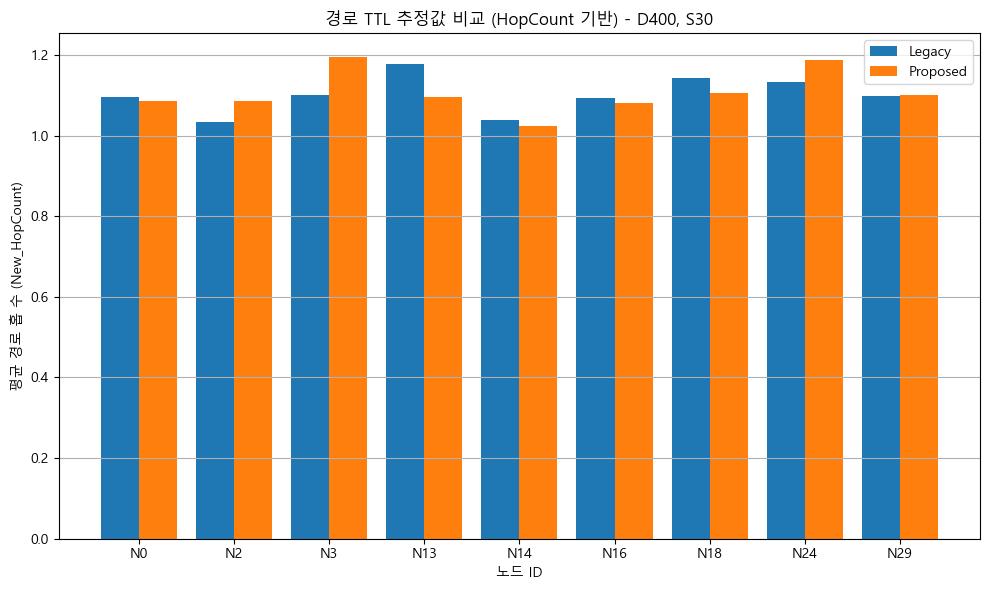

In [149]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]
results = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "aodv_routing_log.csv")
        if not os.path.exists(file_path):
            results[method].append(0)
            continue

        df = pd.read_csv(file_path)
        df.columns = df.columns.str.strip()
        df['New_HopCount'] = pd.to_numeric(df['New_HopCount'], errors='coerce')
        df = df.dropna(subset=['New_HopCount'])

        avg_hop = df['New_HopCount'].mean() if not df.empty else 0
        results[method].append(avg_hop)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("평균 경로 홉 수 (New_HopCount)")
plt.xlabel("노드 ID")
plt.title(f"경로 TTL 추정값 비교 (HopCount 기반) - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


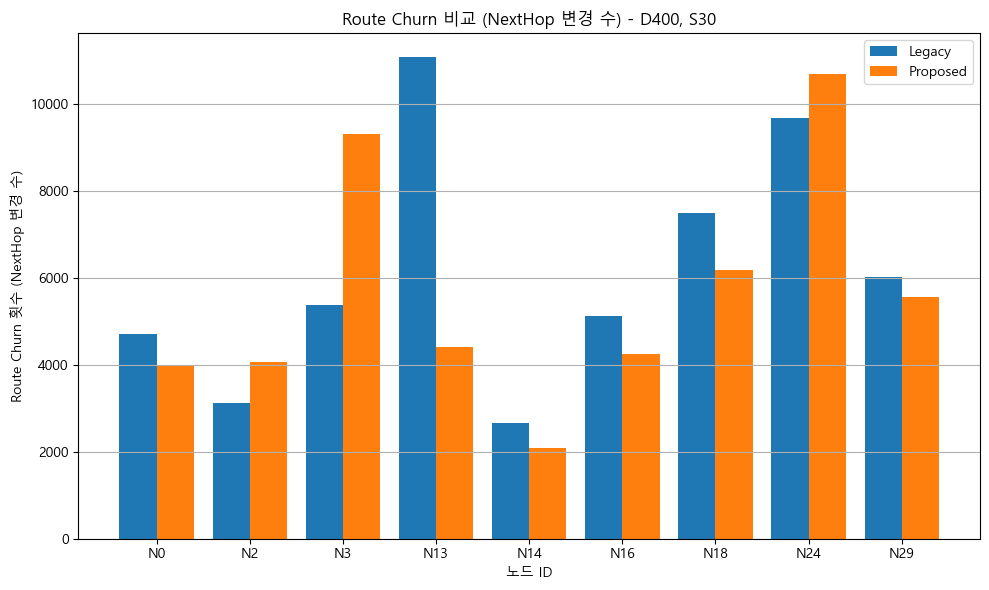

In [150]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 설정
base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]
results = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "aodv_routing_log.csv")
        if not os.path.exists(file_path):
            results[method].append(0)
            continue

        df = pd.read_csv(file_path)
        df.columns = df.columns.str.strip()
        df['Previous_NextHop'] = df['Previous_NextHop'].astype(str)
        df['New_NextHop'] = df['New_NextHop'].astype(str)

        churn_count = (df['Previous_NextHop'] != df['New_NextHop']).sum()
        results[method].append(churn_count)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("Route Churn 횟수 (NextHop 변경 수)")
plt.xlabel("노드 ID")
plt.title(f"Route Churn 비교 (NextHop 변경 수) - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


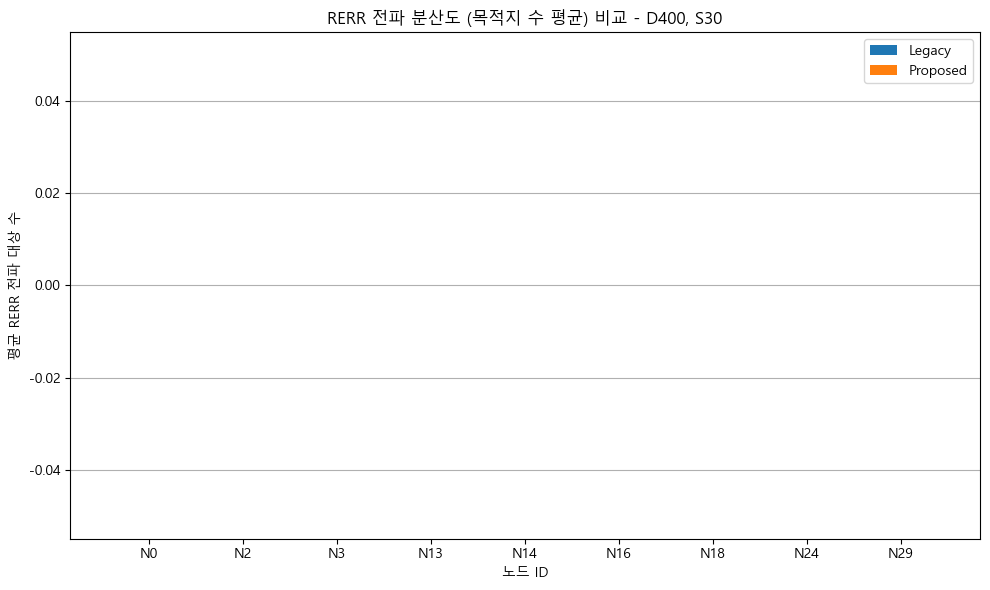

In [151]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# 설정
base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]
results = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "rerr_debug.txt")
        if not os.path.exists(file_path):
            results[method].append(0)
            continue

        with open(file_path, "r", encoding="utf-8") as f:
            lines = f.readlines()

        count = 0
        total_dests = 0
        for line in lines:
            line = line.strip()
            if "RERR 생성" in line and "대상:" in line:
                count += 1
                total_dests += line.count("대상:")

        avg_targets = total_dests / count if count > 0 else 0
        results[method].append(avg_targets)

# 시각화
x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("평균 RERR 전파 대상 수")
plt.xlabel("노드 ID")
plt.title(f"RERR 전파 분산도 (목적지 수 평균) 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


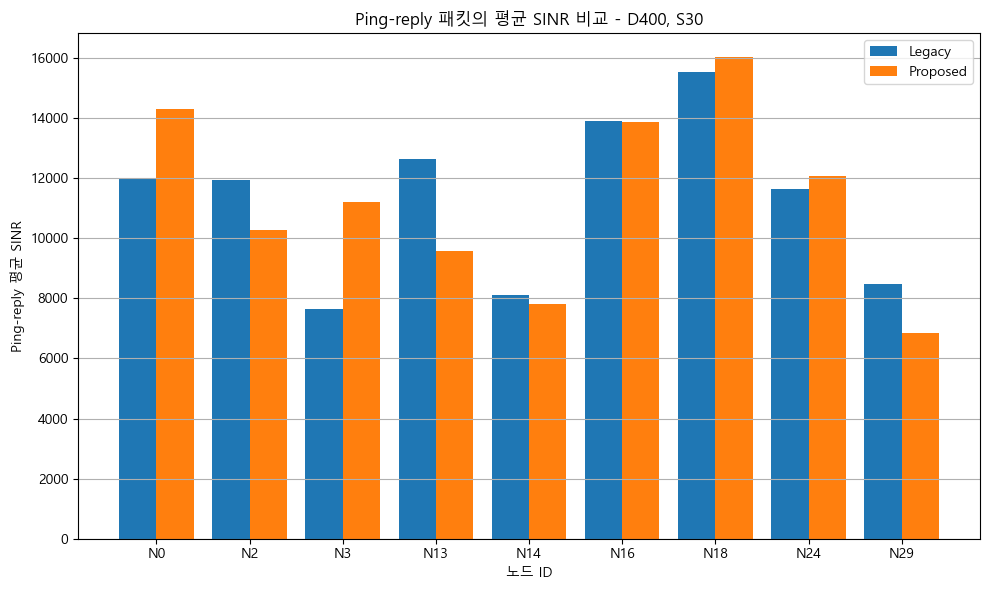

In [124]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'nodeId']
results = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results[method].append(None)
            continue

        df = pd.read_csv(file_path, names=columns, header=None, dtype=str)
        df = df[df['Packet'].str.contains("-reply", na=False)].copy()
        df['SINR'] = pd.to_numeric(df['SINR'], errors='coerce')
        df = df.dropna(subset=['SINR'])

        mean_sinr = df['SINR'].mean() if not df.empty else None
        results[method].append(mean_sinr)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("Ping-reply 평균 SINR")
plt.xlabel("노드 ID")
plt.title(f"Ping-reply 패킷의 평균 SINR 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


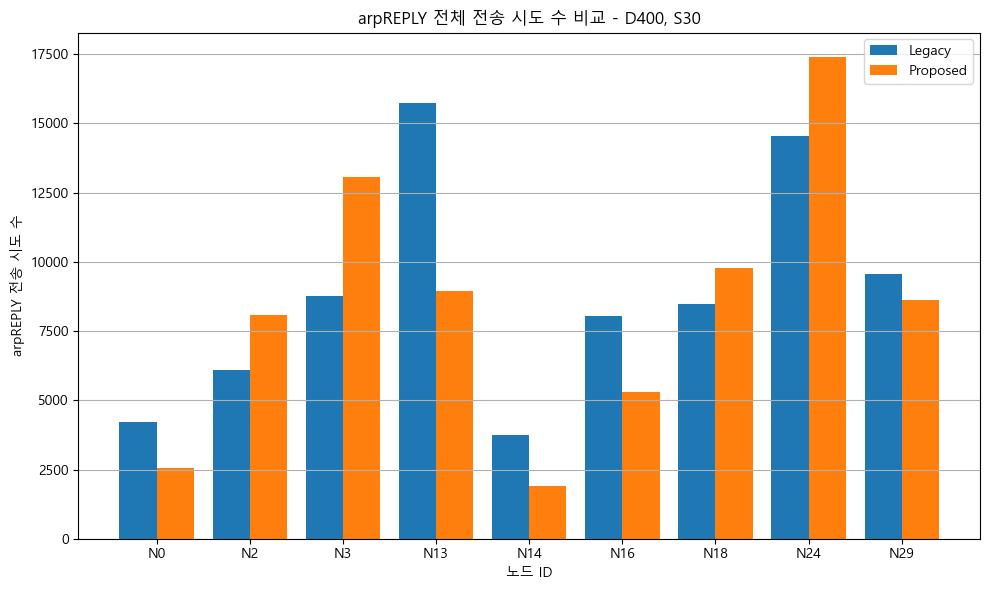

In [126]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]
columns = ['Time', 'SINR', 'Packet', 'Sender', 'Receiver', 'Success']
results = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None, dtype=str)
        df = df[df['Packet'].str.contains("arpREPLY", na=False)].copy()
        count = len(df)
        results[method].append(count)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("arpREPLY 전송 시도 수")
plt.xlabel("노드 ID")
plt.title(f"arpREPLY 전체 전송 시도 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


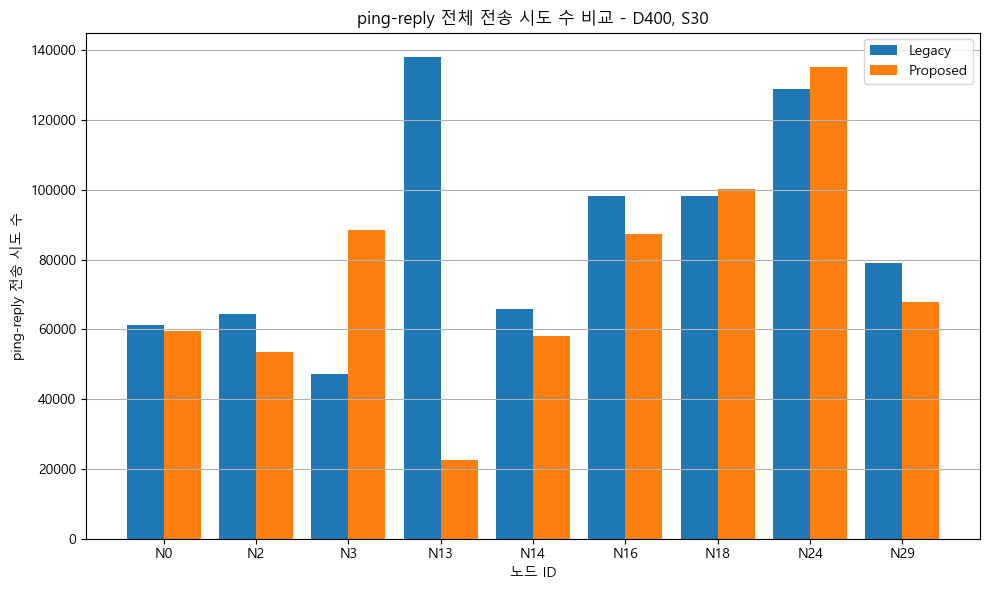

In [128]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]
columns = ['Time', 'SINR', 'Packet', 'Sender', 'Receiver', 'Success']
results = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None, dtype=str)
        df = df[df['Packet'].str.contains("-reply", na=False)].copy()
        count = len(df)
        results[method].append(count)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("ping-reply 전송 시도 수")
plt.xlabel("노드 ID")
plt.title(f"ping-reply 전체 전송 시도 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


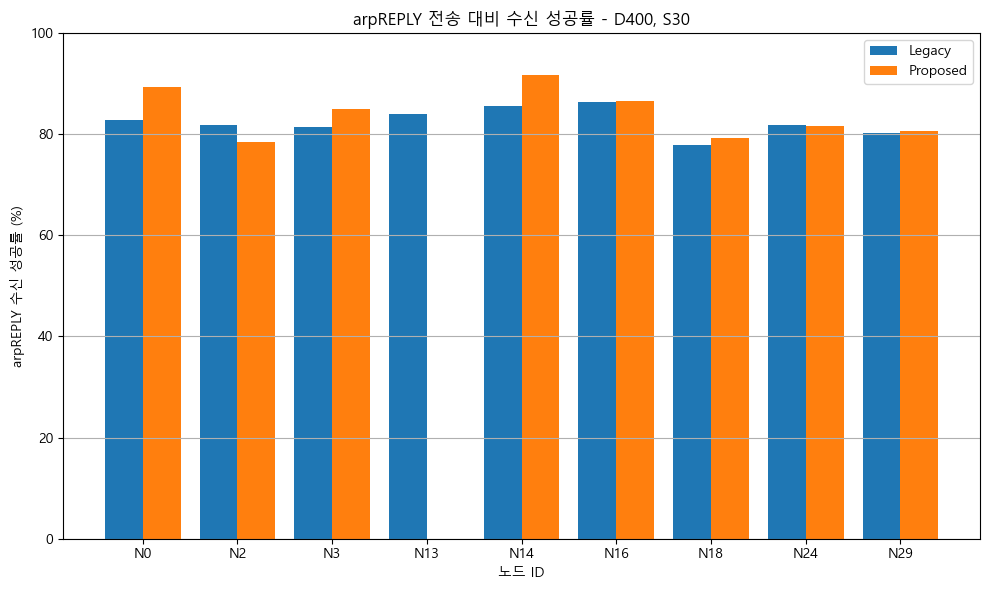

In [118]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 실험 설정
base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]
columns = ['Time', 'SINR', 'Packet', 'Sender', 'Receiver', 'Success']
results = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            results[method].append(0)
            continue

        df = pd.read_csv(file_path, names=columns, header=None, dtype=str)
        df = df[df['Packet'].str.contains("arpREPLY", na=False)].copy()

        df['Success'] = df['Success'].str.upper() == 'TRUE'
        total = len(df)
        success = df['Success'].sum()
        rate = (success / total * 100) if total > 0 else 0
        results[method].append(rate)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("arpREPLY 수신 성공률 (%)")
plt.xlabel("노드 ID")
plt.title(f"arpREPLY 전송 대비 수신 성공률 - {density}, {speed}")
plt.ylim(0, 100)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


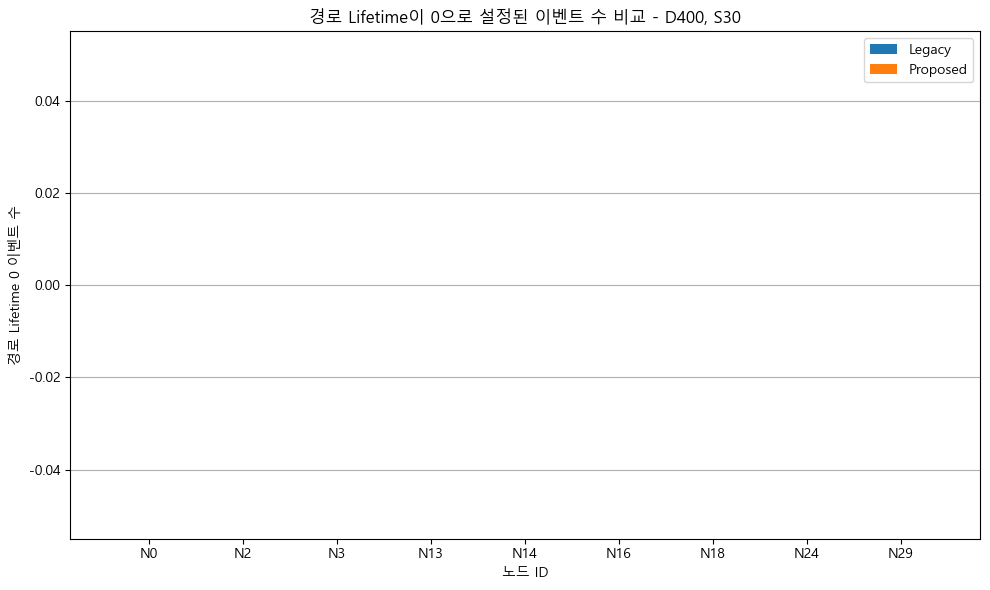

In [110]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]
results_zero_lifetime = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "aodv_routing_log.csv")
        if not os.path.exists(file_path):
            results_zero_lifetime[method].append(0)
            continue

        df = pd.read_csv(file_path)
        df.columns = df.columns.str.strip()
        df['New_LifeTime'] = pd.to_numeric(df['New_LifeTime'], errors='coerce')
        zero_count = (df['New_LifeTime'] == 0).sum()
        results_zero_lifetime[method].append(zero_count)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results_zero_lifetime['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results_zero_lifetime['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("경로 Lifetime 0 이벤트 수")
plt.xlabel("노드 ID")
plt.title(f"경로 Lifetime이 0으로 설정된 이벤트 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


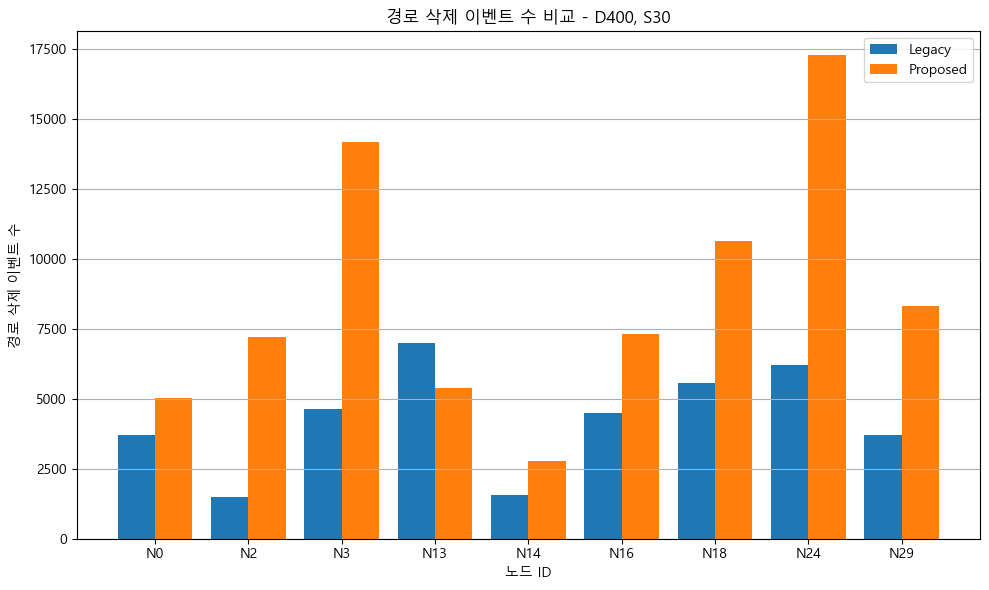

In [100]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]
results = {'L': [], 'P': []}

for method in methods:
    for node in nodes:
        file_path = os.path.join(base_path, method, density, speed, node, "aodv_routing_log.csv")
        if not os.path.exists(file_path):
            results[method].append(0)
            continue

        df = pd.read_csv(file_path)
        df.columns = df.columns.str.strip()

        df['Previous_LifeTime'] = pd.to_numeric(df['Previous_LifeTime'], errors='coerce')
        df['New_LifeTime'] = pd.to_numeric(df['New_LifeTime'], errors='coerce')

        drop_count = (df['New_LifeTime'] < df['Previous_LifeTime']).sum()
        results[method].append(drop_count)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("경로 삭제 이벤트 수")
plt.xlabel("노드 ID")
plt.title(f"경로 삭제 이벤트 수 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [144]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]
results = {'L': [], 'P': []}

time_window = 0.5

for method in methods:
    for node in nodes:
        routing_path = os.path.join(base_path, method, density, speed, node, "aodv_routing_log.csv")
        sinr_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        
        if not os.path.exists(routing_path) or not os.path.exists(sinr_path):
            results[method].append(0)
            continue

        routing_df = pd.read_csv(routing_path)
        routing_df.columns = routing_df.columns.str.strip()
        sinr_df = pd.read_csv(sinr_path, header=None)
        sinr_df.columns = ['Time', 'SINR', 'Packet', 'Sender', 'Receiver', 'Success']

        routing_df['Time'] = pd.to_numeric(routing_df['Time'], errors='coerce')
        routing_df['New_NextHop'] = pd.to_numeric(routing_df['New_NextHop'], errors='coerce')
        sinr_df['Time'] = pd.to_numeric(sinr_df['Time'], errors='coerce')
        sinr_df['Sender'] = pd.to_numeric(sinr_df['Sender'], errors='coerce')

        routing_df = routing_df.dropna(subset=['Time', 'New_NextHop'])
        sinr_df = sinr_df.dropna(subset=['Time', 'Sender'])

        congestion_list = []

        for _, row in routing_df.iterrows():
            t = row['Time']
            nexthop = row['New_NextHop']
            nearby_tx = sinr_df[
                (sinr_df['Sender'] == nexthop) &
                (sinr_df['Time'] >= t - time_window) &
                (sinr_df['Time'] <= t + time_window)
            ]
            congestion_list.append(len(nearby_tx))

        avg_congestion = np.mean(congestion_list) if congestion_list else 0
        results[method].append(avg_congestion)

x = range(len(nodes))
plt.figure(figsize=(10, 6))
plt.bar([i - 0.2 for i in x], results['L'], width=0.4, label='Legacy')
plt.bar([i + 0.2 for i in x], results['P'], width=0.4, label='Proposed')
plt.xticks(x, nodes)
plt.ylabel("New_NextHop 송신 혼잡도 (±0.5초 내 전송 수)")
plt.xlabel("노드 ID")
plt.title(f"경로 설정 시점 혼잡도 비교 - {density}, {speed}")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2839918375.py:28: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  sinr_df = pd.read_csv(sinr_path, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2839918375.py:28: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  sinr_df = pd.read_csv(sinr_path, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2839918375.py:28: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  sinr_df = pd.read_csv(sinr_path, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\2839918375.py:28: DtypeWarning: Columns (0,1,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  sinr_df = pd.read_csv(sinr_path, header=None)
C:\Users\Choe JongHyeon\AppData\Local\Temp\ipykernel_57772\283991837

ValueError: Length mismatch: Expected axis has 4 elements, new values have 6 elements

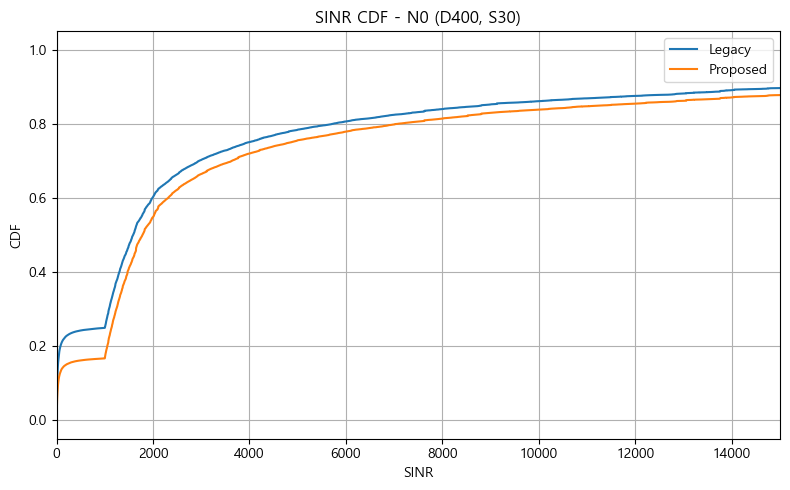

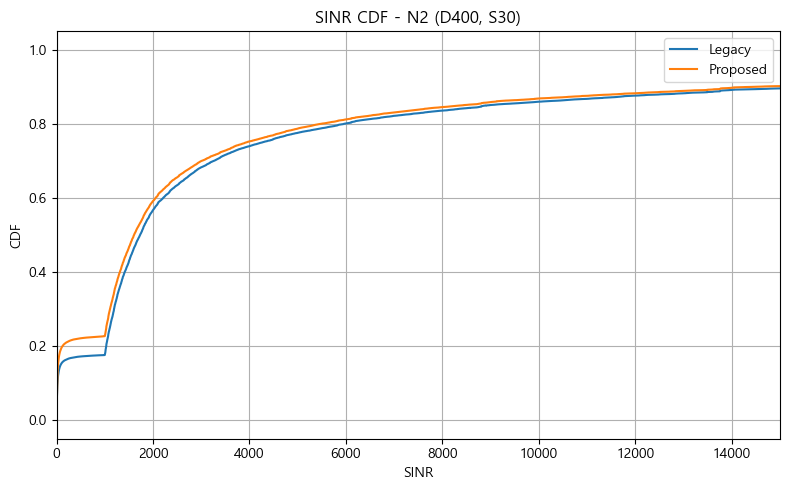

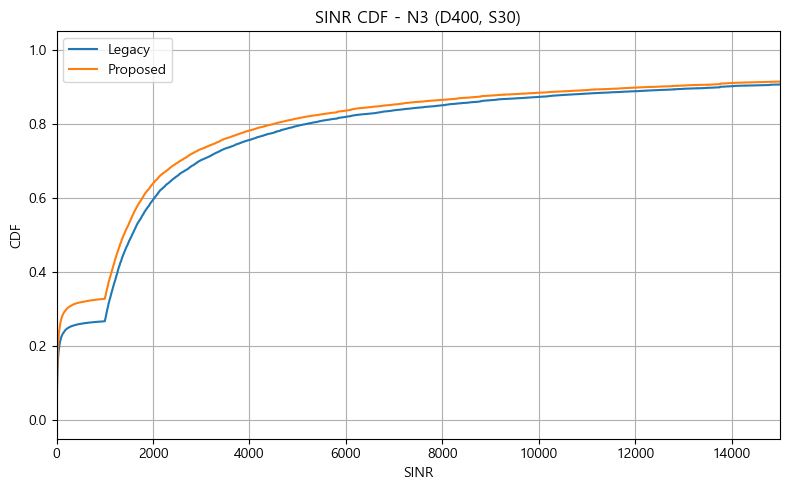

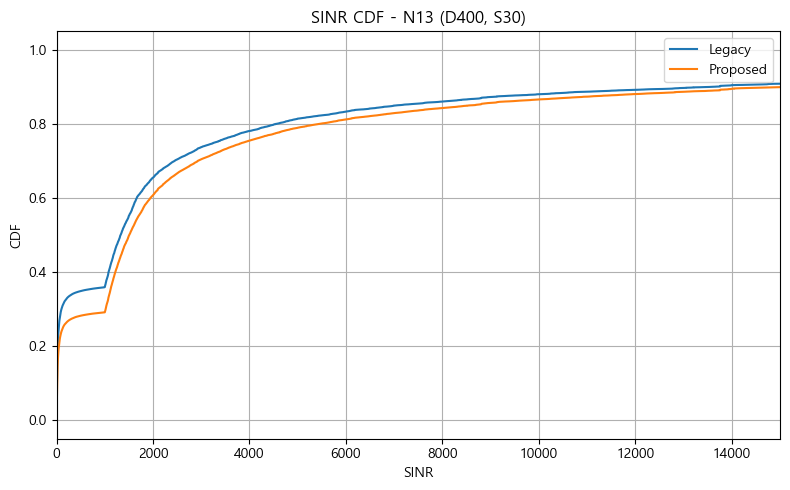

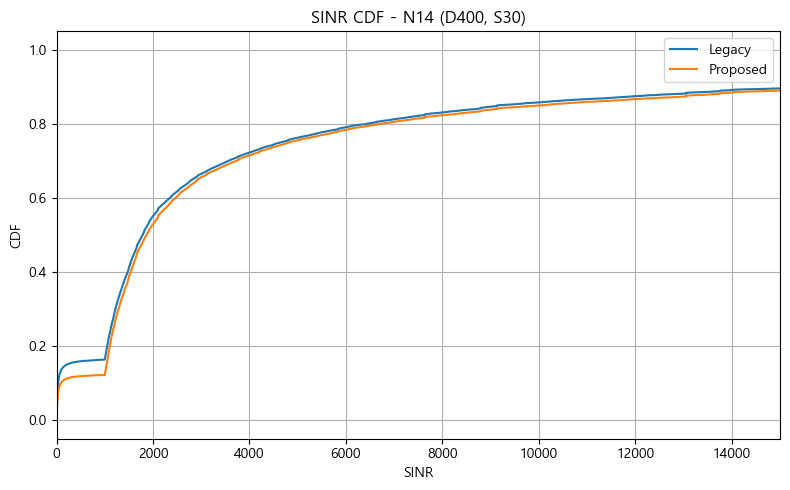

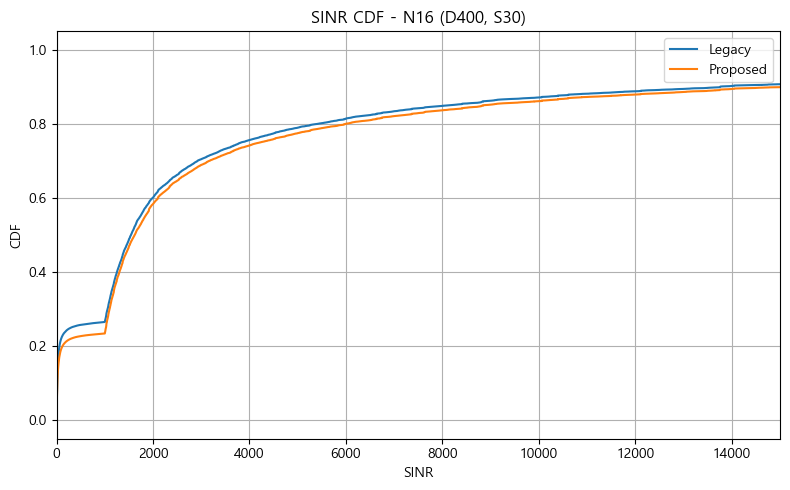

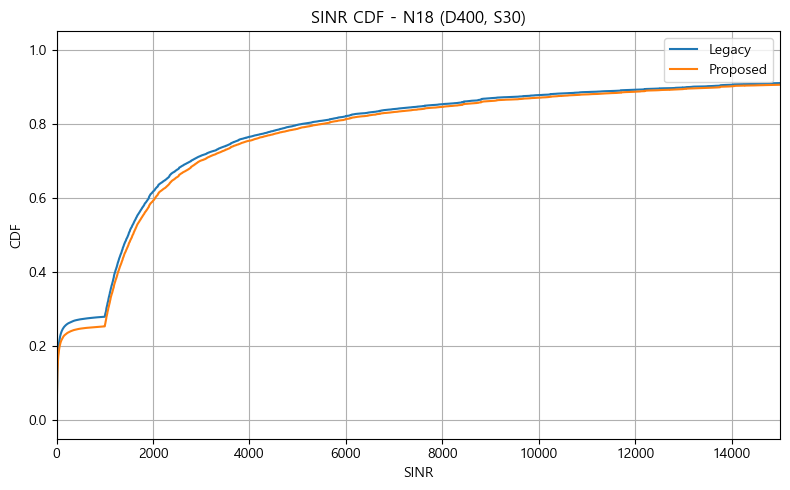

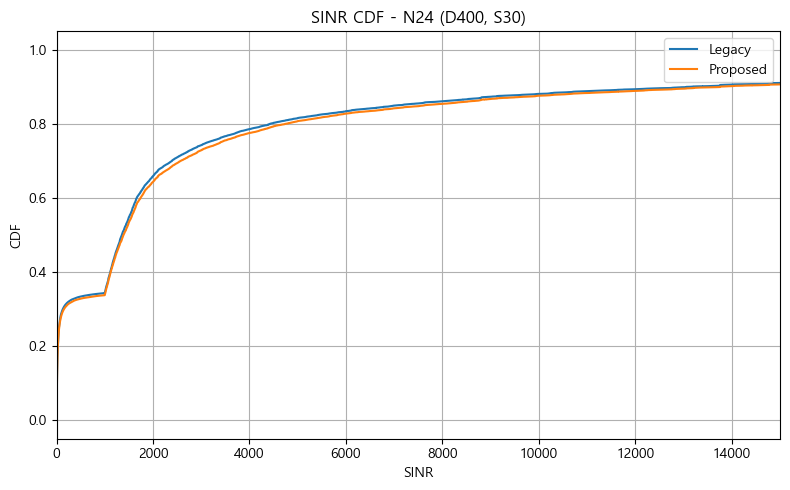

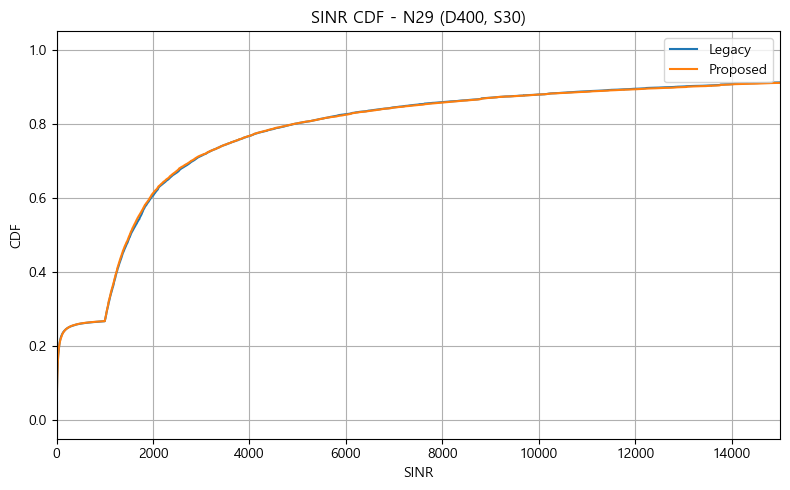

In [74]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 설정
base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_05_08_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
columns = ['Time', 'SINR', 'Packet', 'sender', 'receiver', 'x', 'y', 'z', 'Nearby', 'Total']
methods = ['L', 'P']

def get_cdf_data(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

for node in nodes:
    sinr_data = {'L': [], 'P': []}

    for method in methods:
        file_path = os.path.join(base_path, method, density, speed, node, "sinr_all_log.csv")
        if not os.path.exists(file_path):
            continue

        df = pd.read_csv(file_path, names=columns, header=None, dtype=str)
        df['SINR'] = pd.to_numeric(df['SINR'], errors='coerce')
        df = df.dropna(subset=['SINR'])

        sinr_data[method] = df['SINR'].tolist()

    if not sinr_data['L'] or not sinr_data['P']:
        continue

    x_L, cdf_L = get_cdf_data(sinr_data['L'])
    x_P, cdf_P = get_cdf_data(sinr_data['P'])

    plt.figure(figsize=(8, 5))
    plt.plot(x_L, cdf_L, label='Legacy')
    plt.plot(x_P, cdf_P, label='Proposed')
    plt.title(f"SINR CDF - {node} ({density}, {speed})")
    plt.xlabel("SINR")
    plt.ylabel("CDF")
    plt.xlim(0, 15000)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
